In [82]:
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np                                # For matrix operations and numerical processing
import pandas as pd                               # For munging tabular data
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import Image                 # For displaying images in the notebook
from IPython.display import display               # For displaying outputs in the notebook
from time import gmtime, strftime                 # For labeling Amazon SageMaker models, endpoints, etc.
import sys                                        # For writing outputs to the notebook
import math                                       # For ceiling function
import json                                       # For parsing hosting outputs
import os                                         # For manipulating filepath names
from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression()

from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression(solver='lbfgs')

from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [83]:
## Loading dataset
df= pd.read_csv('./Cloud_data_service_20201001D35.csv')

In [84]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,Services
0,2,3,4,6,6,6,6,Storage
1,3,1,1,1,6,3,3,Analytics
2,6,6,5,6,4,6,5,Database
3,4,4,6,5,5,6,5,Database
4,4,4,4,5,3,4,6,Storage


In [85]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.279900,4.278500,4.244400,4.274500,4.239100,4.278100,4.105300
std,1.738752,1.731138,1.750364,1.749644,1.747523,1.744266,1.743478
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [86]:
## CLoud services overview
df['Services'].value_counts()

Database     3890
CDN          2055
Storage      2031
Analytics     959
CICD          801
Network       264
Name: Services, dtype: int64

In [87]:
df.dtypes

F1           int64
F2           int64
F3           int64
F4           int64
F5           int64
F6           int64
F7           int64
Services    object
dtype: object

In [88]:
df.head(20)

,F1,F2,F3,F4,F5,F6,F7,Services
0,2,3,4,6,6,6,6,Storage
1,3,1,1,1,6,3,3,Analytics
2,6,6,5,6,4,6,5,Database
3,4,4,6,5,5,6,5,Database
4,4,4,4,5,3,4,6,Storage
5,6,6,3,6,6,6,6,Database
6,4,6,6,6,6,3,2,Database
7,6,2,1,5,1,4,5,CDN
8,6,3,6,6,6,3,2,Database
9,5,3,2,6,1,1,1,CDN


In [89]:
df.query("Services==\"Network\"")[['F1','F2','F3','F4','F5','F7']]

,F1,F2,F3,F4,F5,F7
42,1,1,2,2,4,1
43,4,2,1,1,1,3
78,1,1,2,1,3,2
87,1,3,1,4,4,3
196,2,2,1,4,1,3
...,...,...,...,...,...,...
9926,1,1,2,2,2,1
9927,3,1,1,1,1,1
9964,1,1,4,1,1,1
9978,4,1,2,1,1,2


In [90]:
df['Services'].value_counts()

Database     3890
CDN          2055
Storage      2031
Analytics     959
CICD          801
Network       264
Name: Services, dtype: int64

In [91]:
## Total number of records
df['Services'].size

10000

In [92]:
## Total number of services
df['Services'].unique().size

6

In [93]:
## Implement One-encoder approach
df2 = pd.get_dummies(df['Services'])

In [94]:
df2.head(10)

,Analytics,CDN,CICD,Database,Network,Storage
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,1
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,1,0,0,0,0
8,0,0,0,1,0,0
9,0,1,0,0,0,0


In [95]:
df3 = pd.concat([df,df2],axis=1)

In [96]:
service_count = df2.columns.size
service_count

6

In [97]:

for column_name in df2.columns:
    print(f"column name is : {column_name}")


column name is : Analytics
column name is : CDN
column name is : CICD
column name is : Database
column name is : Network
column name is : Storage


20201018 Using database as the test case

In [98]:
sample0 = df3[['F1','F2','F3','F4','F5','F7', df2.columns[3]]]

In [99]:
sample0.head()

,F1,F2,F3,F4,F5,F7,Database
0,2,3,4,6,6,6,0
1,3,1,1,1,6,3,0
2,6,6,5,6,4,5,1
3,4,4,6,5,5,5,1
4,4,4,4,5,3,6,0


In [100]:
Xs = sample0[['F1','F2','F3','F4','F5', 'F7']]

In [101]:
Xs.head()

,F1,F2,F3,F4,F5,F7
0,2,3,4,6,6,6
1,3,1,1,1,6,3
2,6,6,5,6,4,5
3,4,4,6,5,5,5
4,4,4,4,5,3,6


In [102]:
Xs.shape

(10000, 6)

In [103]:
ys = sample0.drop(['F1','F2','F3','F4','F5','F7'], axis=1)
ys

,Database
0,0
1,0
2,1
3,1
4,0
...,...
9995,1
9996,0
9997,1
9998,0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(Xs,ys,test_size=0.3,random_state=101)

In [105]:
X_train.shape

(7000, 6)

In [106]:
X_test.shape

(3000, 6)

In [107]:
y_train.shape

(7000, 1)

In [108]:
y_test.shape

(3000, 1)

In [109]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:


predictions = clf.predict(X_test)
print(predictions)



[[ 0.36435968]
 [ 0.44540307]
 [ 0.66158776]
 ...
 [-0.00423005]
 [-0.2590762 ]
 [ 0.61423531]]


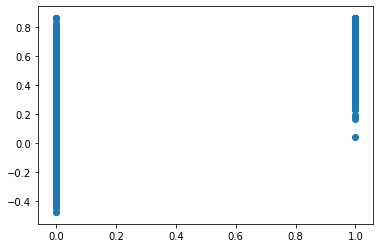

In [111]:
plt.scatter(y_test, predictions)

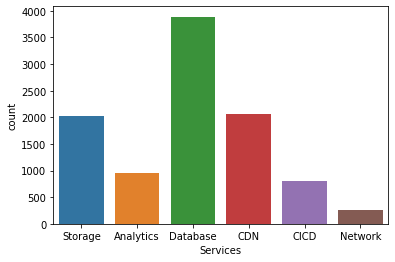

In [112]:
sns.countplot(df['Services'],label="Count")
plt.show()

In [113]:
df.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'Services'], dtype='object')

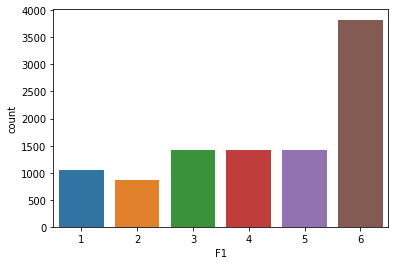

In [114]:
sns.countplot(df['F1'],label="Count")
plt.show()

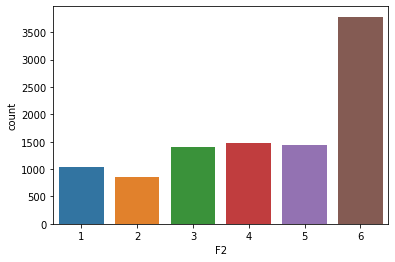

In [115]:
sns.countplot(df['F2'],label="Count")
plt.show()

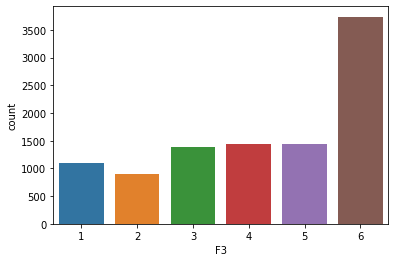

In [116]:
sns.countplot(df['F3'],label="Count")
plt.show()

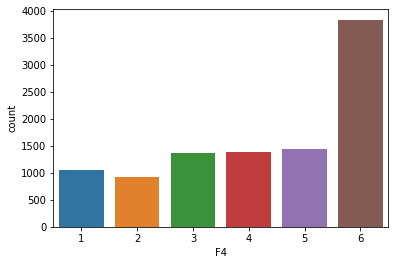

In [117]:
sns.countplot(df['F4'],label="Count")
plt.show()

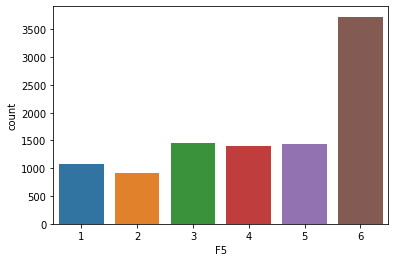

In [118]:
sns.countplot(df['F5'],label="Count")
plt.show()

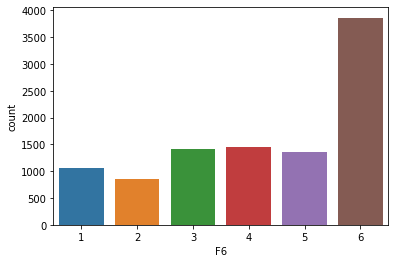

In [119]:
sns.countplot(df['F6'],label="Count")
plt.show()

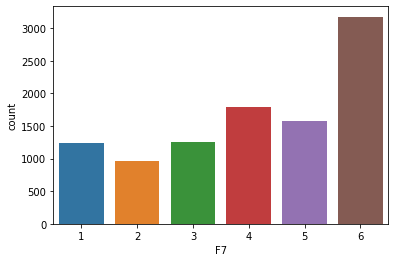

In [120]:
sns.countplot(df['F7'],label="Count")
plt.show()

In [121]:
df4=df.drop(['F6','Services'], axis =1)


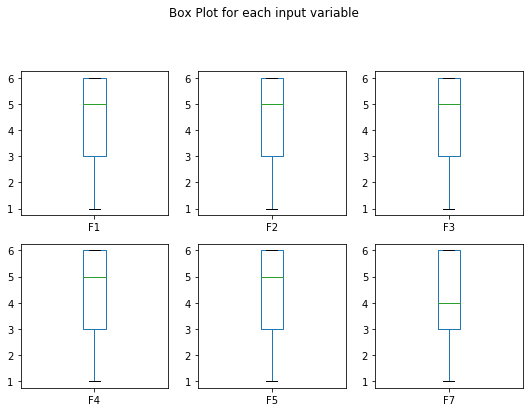

In [122]:

df4.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('service_box')
plt.show()

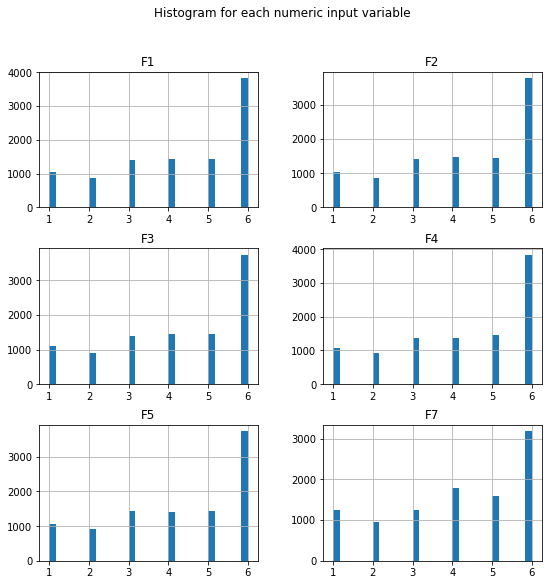

In [123]:
import pylab as pl
df4.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('cloud_hist')
plt.show()

In [124]:
logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
logreg.fit(X_train, np.array(y_train).reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.81


In [126]:
y_train.shape

(7000, 1)

In [127]:
np.array(y_train).reshape(-1)

array([1, 1, 0, ..., 1, 0, 0], dtype=uint8)

In [128]:
AX_record = [[4,3,3,4,2,3]]

In [129]:
np.array(X_train)

array([[3, 5, 6, 6, 5, 6],
       [6, 5, 3, 4, 3, 3],
       [6, 3, 6, 5, 6, 1],
       ...,
       [6, 4, 5, 5, 6, 5],
       [6, 6, 4, 5, 3, 6],
       [1, 5, 3, 1, 4, 2]])

In [130]:
y_pred=logreg.predict(X_test)

In [131]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [132]:
sample0.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F7', 'Database'], dtype='object')

In [133]:
from sklearn.svm import SVC
svm = SVC()
# svm.fit(X_train, y_train)
svm.fit(X_train, np.array(y_train).reshape(-1))
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.86
Accuracy of SVM classifier on test set: 0.86


In [134]:
# 20201031 Add the y_pred 
y_pred = svm.predict(X_test)

In [135]:
# 20201031 Add the roc_curve
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [136]:
# 20201031 Add the roc_auc
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8727742960195111

In [81]:
from sklearn.model_selection import learning_curve, GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=10)
grid_search.fit(X_train, np.array(y_train).reshape(-1))
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [137]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, gamma=0.1)
# svm.fit(X_train, y_train)
svm.fit(X_train, np.array(y_train).reshape(-1))
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.87
Accuracy of SVM classifier on test set: 0.86


In [138]:
Ay_record = svm.predict(AX_record)

In [139]:
Ay_record[0]

0

In [140]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, np.array(y_train).reshape(-1))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.93
Accuracy of Decision Tree classifier on test set: 0.82


In [141]:
# 20201031 Add the y_pred 
y_pred = clf.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8066615604013354

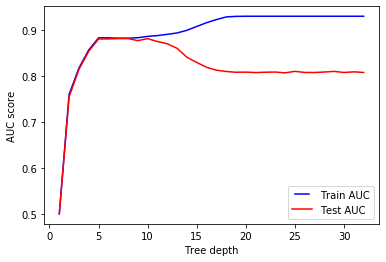

In [142]:
# 20201031 Create the AOC curve for DT - OK
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, np.array(y_train).reshape(-1))   
    train_pred = clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, color='blue', label='Train AUC')
line2, = plt.plot(max_depths, test_results, color='red', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')

plt.show()

In [143]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10).fit(X_train, np.array(y_train).reshape(-1))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.87
Accuracy of Decision Tree classifier on test set: 0.86


In [144]:
Ay_record = clf.predict(AX_record)

In [145]:
Ay_record

array([0], dtype=uint8)

In [146]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, np.array(y_train).reshape(-1))
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.82


In [147]:
# 20201031 Add the y_pred & roc_auc
y_pred = knn.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8264370539952294

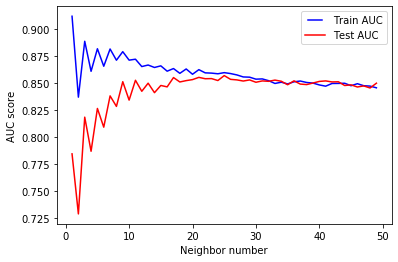

In [150]:
# 20201031 Create the AOC curve for KNN - OK
k_range = range(1, 50)

train_results = []
test_results = []
for k_neighbor in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_neighbor)
    knn.fit(X_train, np.array(y_train).reshape(-1))   
    train_pred = knn.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = knn.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(k_range, train_results, color='blue', label='Train AUC')
line2, = plt.plot(k_range, test_results, color='red', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Neighbor number')

plt.show()

In [151]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, np.array(y_train).reshape(-1))
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.84


In [152]:
Ay_record = knn.predict(AX_record)

In [153]:
Ay_record

array([0], dtype=uint8)

In [154]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1469  382]
 [ 100 1049]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1851
           1       0.73      0.91      0.81      1149

    accuracy                           0.84      3000
   macro avg       0.83      0.85      0.84      3000
weighted avg       0.86      0.84      0.84      3000



In [155]:
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1473  378]
 [  37 1112]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1851
           1       0.75      0.97      0.84      1149

    accuracy                           0.86      3000
   macro avg       0.86      0.88      0.86      3000
weighted avg       0.89      0.86      0.86      3000



In [156]:
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1467  384]
 [  35 1114]]
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      1851
           1       0.74      0.97      0.84      1149

    accuracy                           0.86      3000
   macro avg       0.86      0.88      0.86      3000
weighted avg       0.89      0.86      0.86      3000



In [157]:
pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1536  315]
 [ 259  890]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1851
           1       0.74      0.77      0.76      1149

    accuracy                           0.81      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.81      0.81      0.81      3000



In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, np.array(y_train).reshape(-1))
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.82


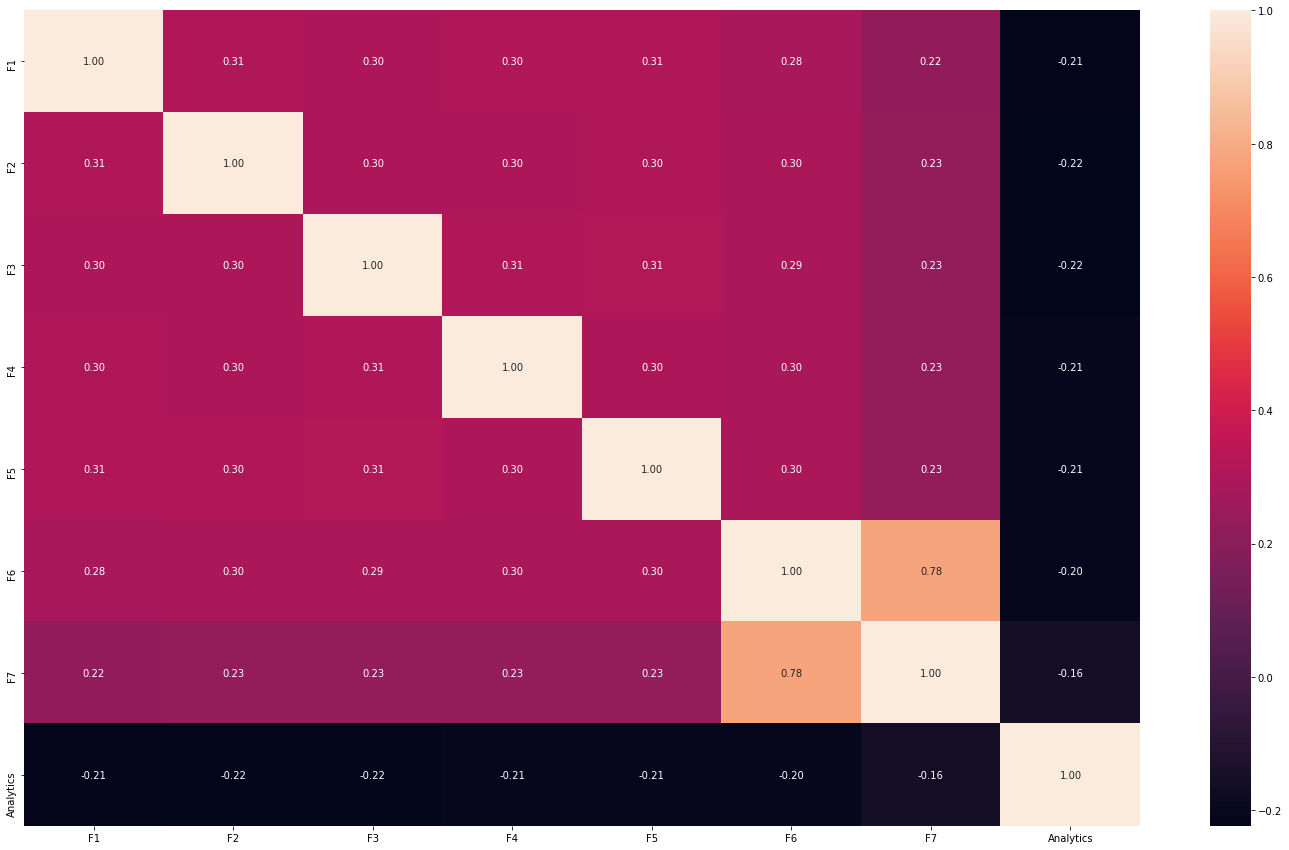

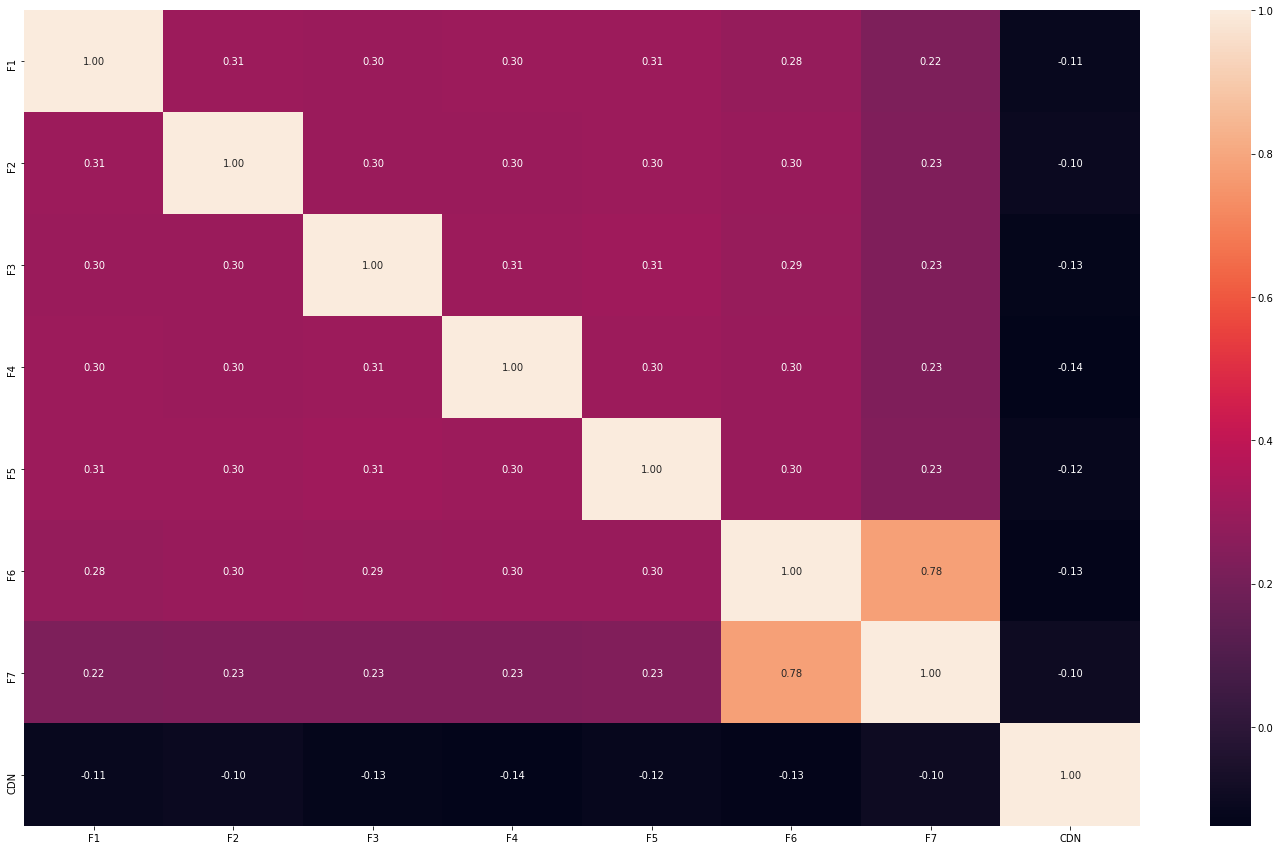

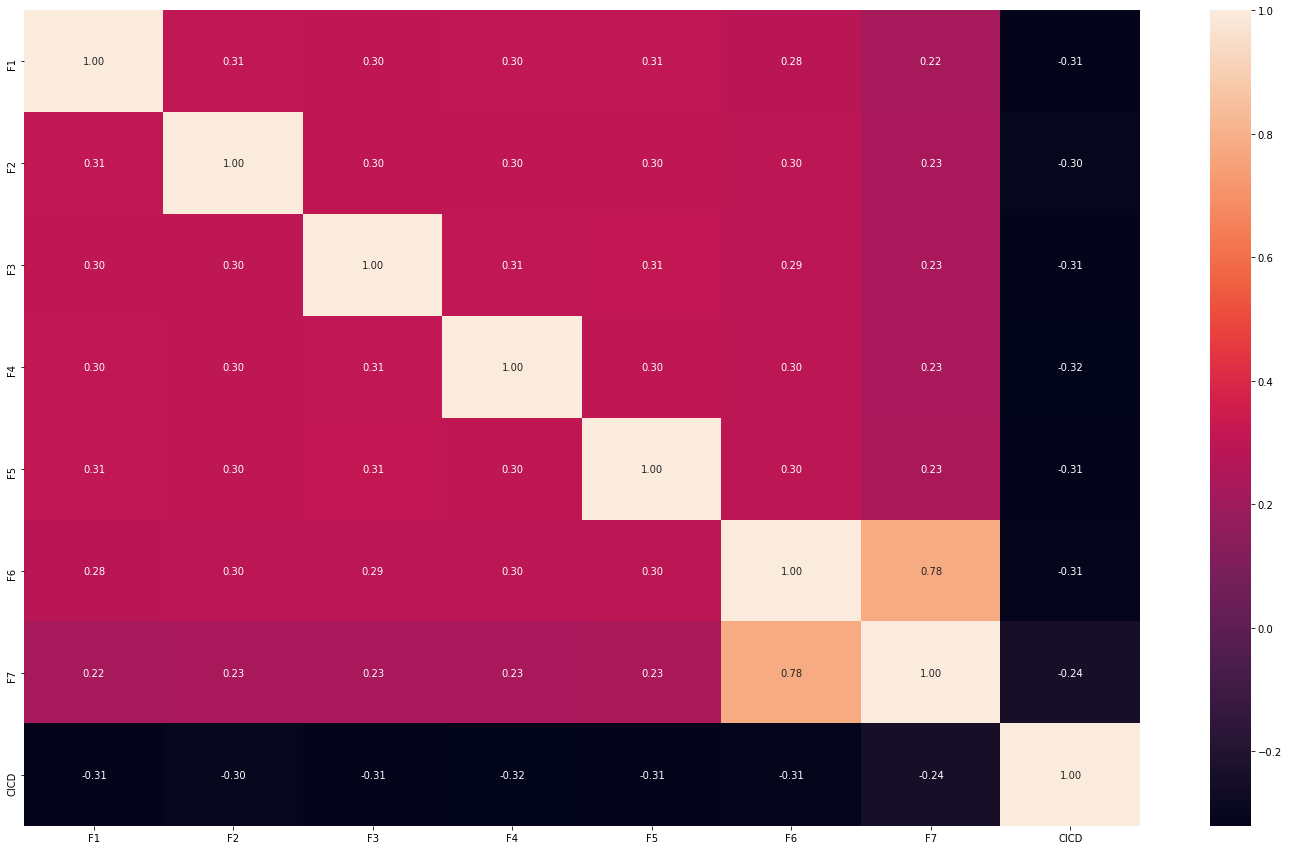

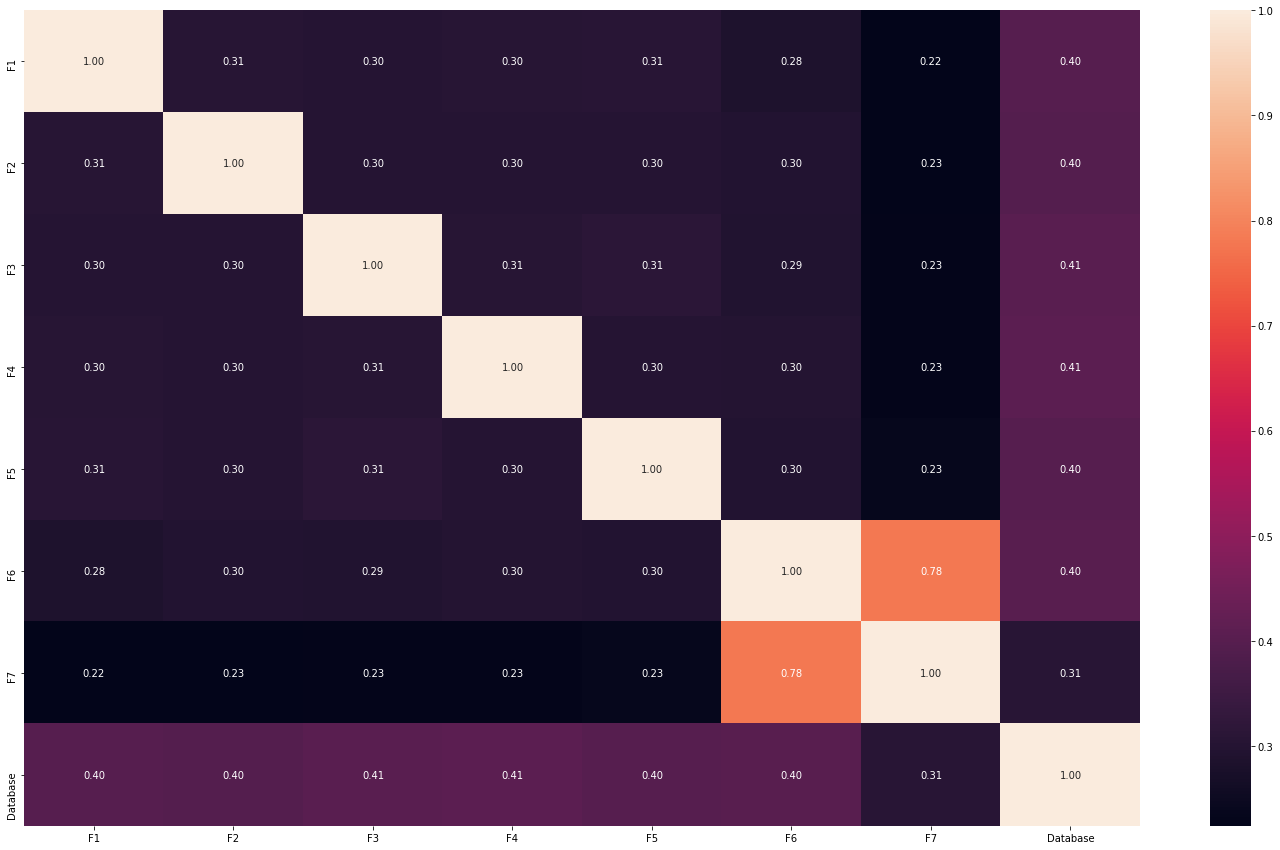

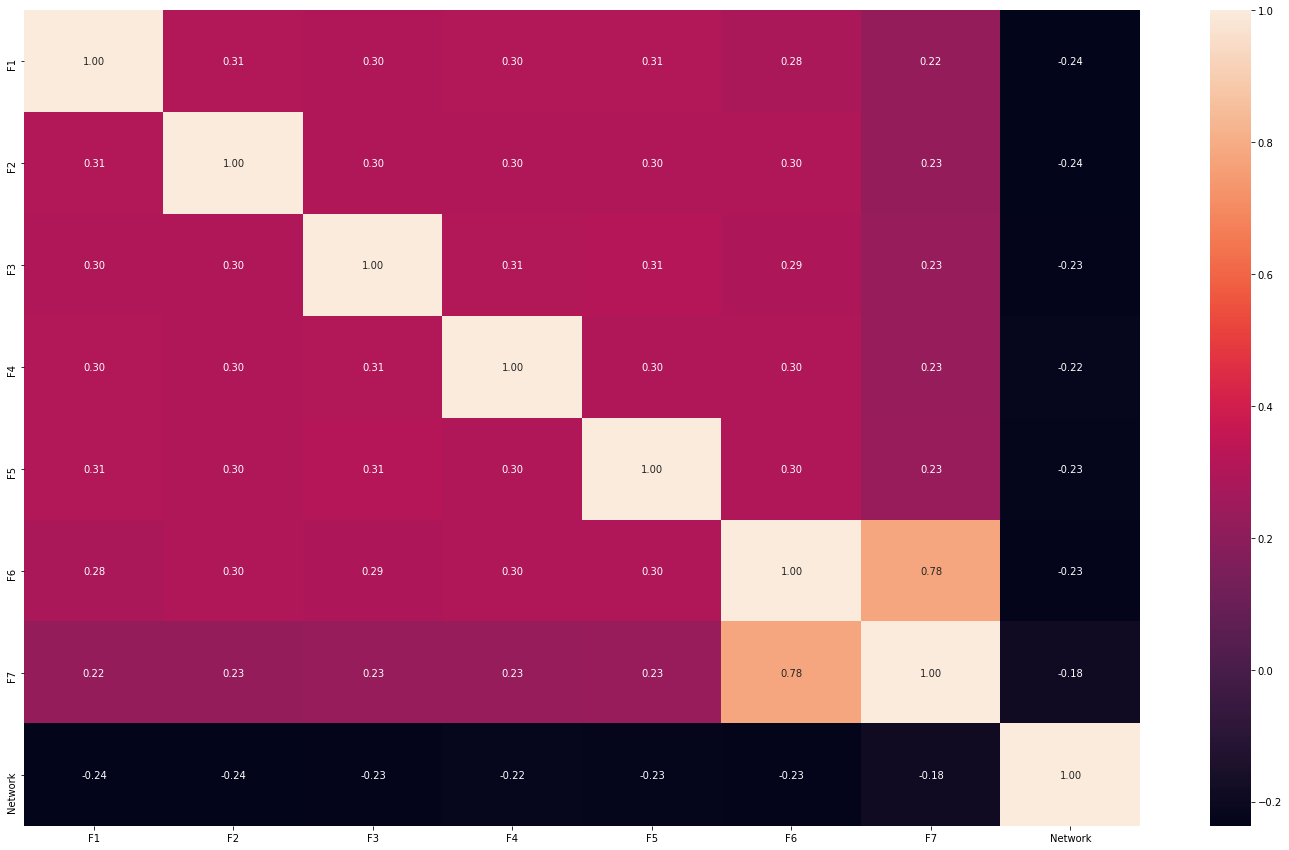

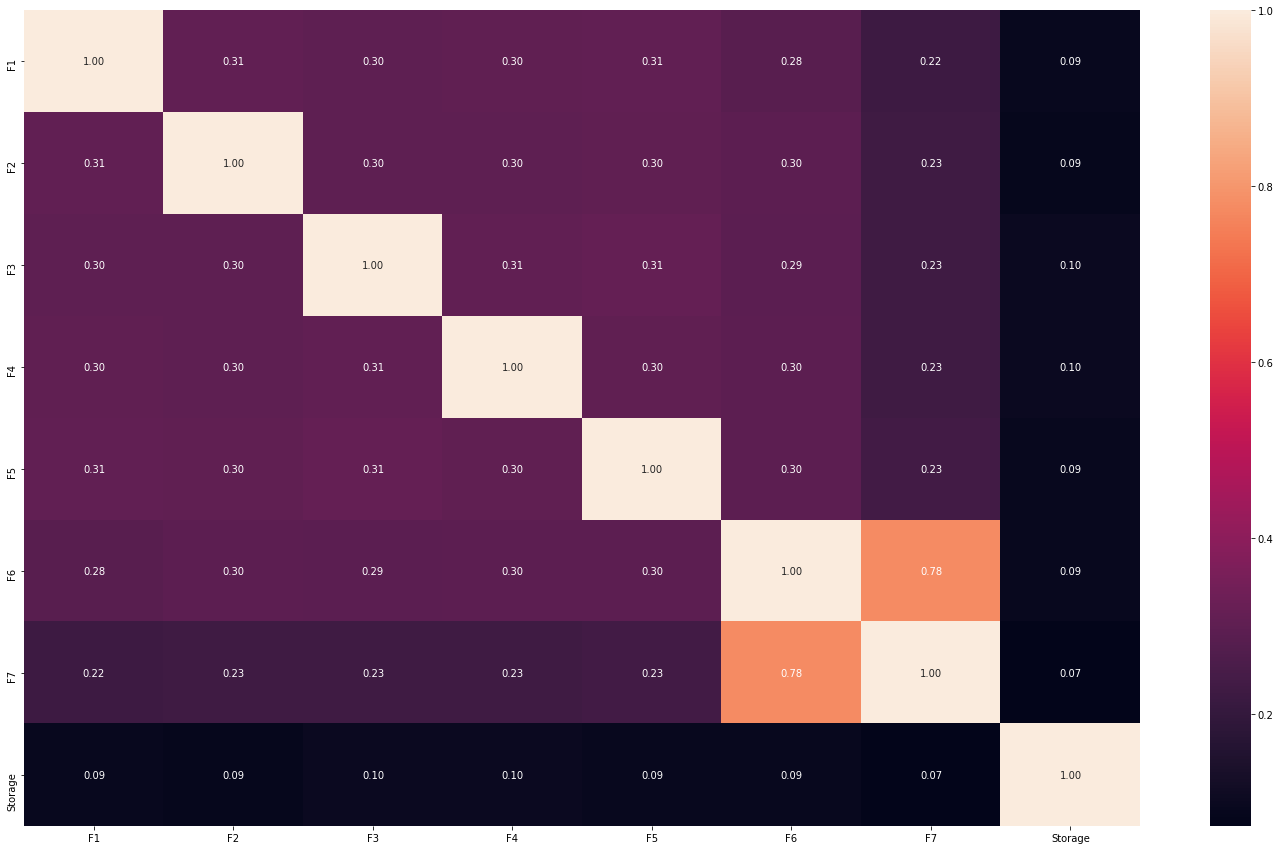

In [158]:
df = pd.read_csv('./Cloud_data_service_20201001D35.csv')
df2 = pd.get_dummies(df['Services'])
df3 = pd.concat([df,df2],axis=1)
service_count = df2.columns.size

for i in range(service_count):
    df_corr = df3[['F1','F2','F3','F4','F5','F6','F7', df2.columns[i]]]
    plt.figure(figsize = (25,15))
    correlation_matrix = df_corr.corr()
    sns.heatmap(correlation_matrix, annot=True,fmt=".2f")

In [159]:
df_corr.head()

,F1,F2,F3,F4,F5,F6,F7,Storage
0,2,3,4,6,6,6,6,1
1,3,1,1,1,6,3,3,0
2,6,6,5,6,4,6,5,0
3,4,4,6,5,5,6,5,0
4,4,4,4,5,3,4,6,1


Down Sample


In [160]:
sample1 = df3[['F1','F2','F3','F4','F5','F7', df2.columns[0]]]
sample1.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F7', 'Analytics'], dtype='object')

In [161]:
sample1.columns[6]

'Analytics'

In [162]:
df_majority = sample1[sample1[sample1.columns[6]]==0]
df_minority = sample1[sample1[sample1.columns[6]]==1]
print(f'major row {df_majority.shape}')
print(f'minor row {df_minority.shape[0]}')

major row (9041, 7)
minor row 959


In [163]:
df_majordownsampled = df_majority.sample(df_minority.shape[0])
print(f'major row {df_majordownsampled.shape}')
print(f'minor row {df_minority.shape[0]}')

major row (959, 7)
minor row 959


In [164]:
sample0 = pd.concat([df_majordownsampled, df_minority])
sample0.shape

(1918, 7)

In [165]:
Xs = sample0[['F1','F2','F3','F4','F5', 'F7']]
ys = sample0.drop(['F1','F2','F3','F4','F5','F7'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(Xs,ys,test_size=0.4,random_state=101)


In [166]:
from sklearn.svm import SVC
svm = SVC()
# svm.fit(X_train, y_train)
svm.fit(X_train, np.array(y_train).reshape(-1))
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.80


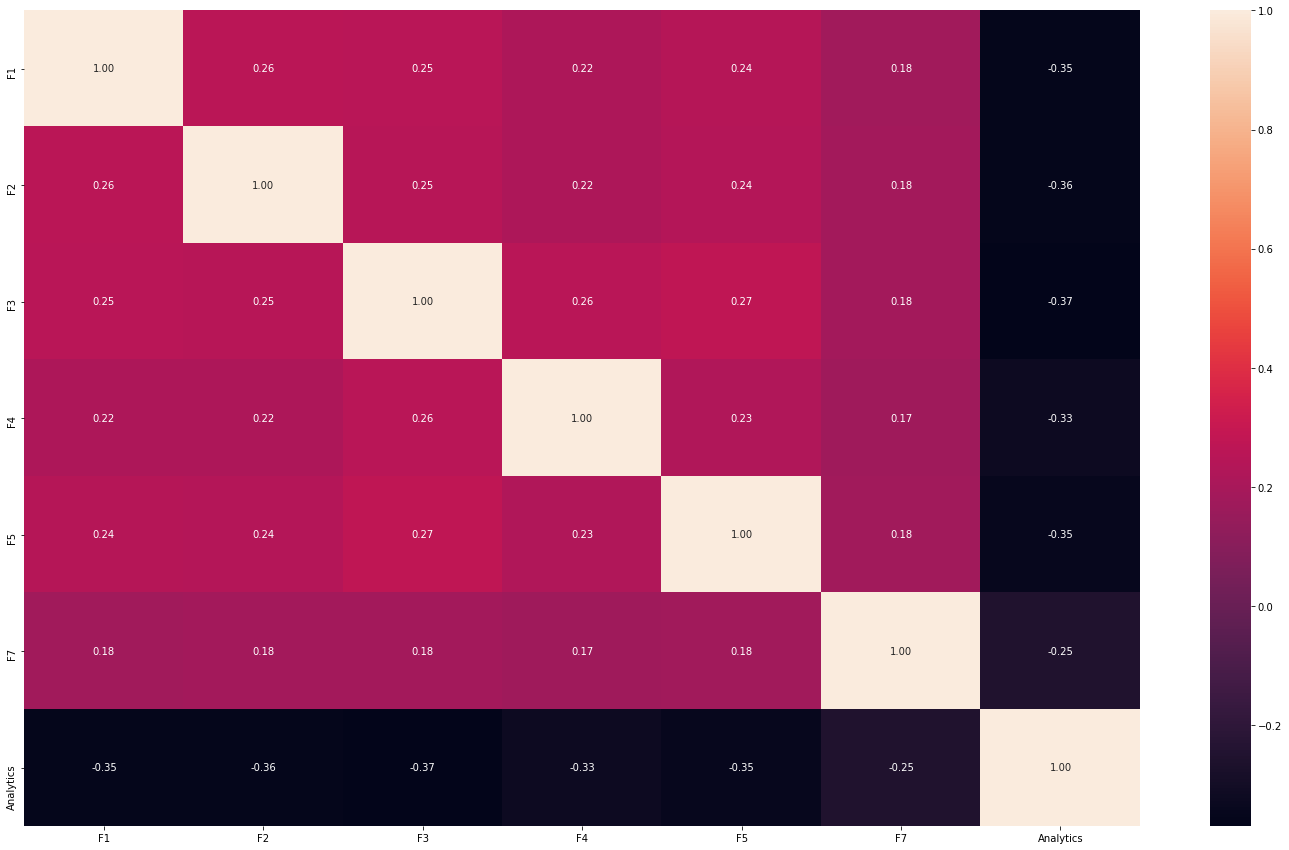

In [167]:

plt.figure(figsize = (25,15))
correlation_matrix = sample0.corr()
sns.heatmap(correlation_matrix, annot=True,fmt=".2f")

In [168]:
sample0.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F7', 'Analytics'], dtype='object')

For loop on all 6 services with downsampling

*****************


 *** Case: Analytics
major row (9041, 7)
minor row 959
major row (959, 7)
minor row 959
column 0 : sample shape: (1918, 7)
Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.77

***
 KNN confusion matrix with X_test (576, 6)

[[209  77]
 [ 55 235]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       286
           1       0.75      0.81      0.78       290

    accuracy                           0.77       576
   macro avg       0.77      0.77      0.77       576
weighted avg       0.77      0.77      0.77       576

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.72

***
 Decision Tree confusion matrix with X_test (576, 6)

[[203  83]
 [ 81 209]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       286
           1       0.72      0.72      0.72       290

  

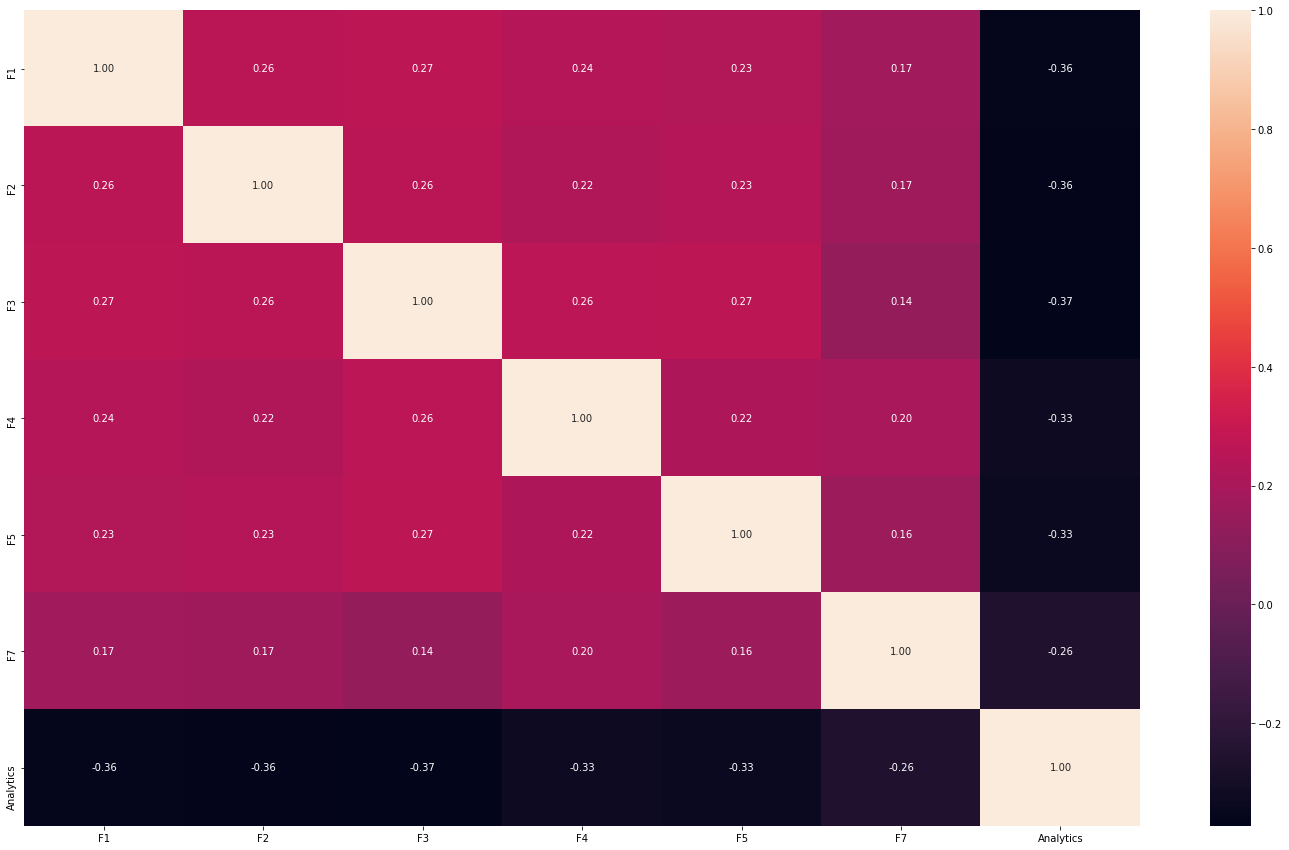

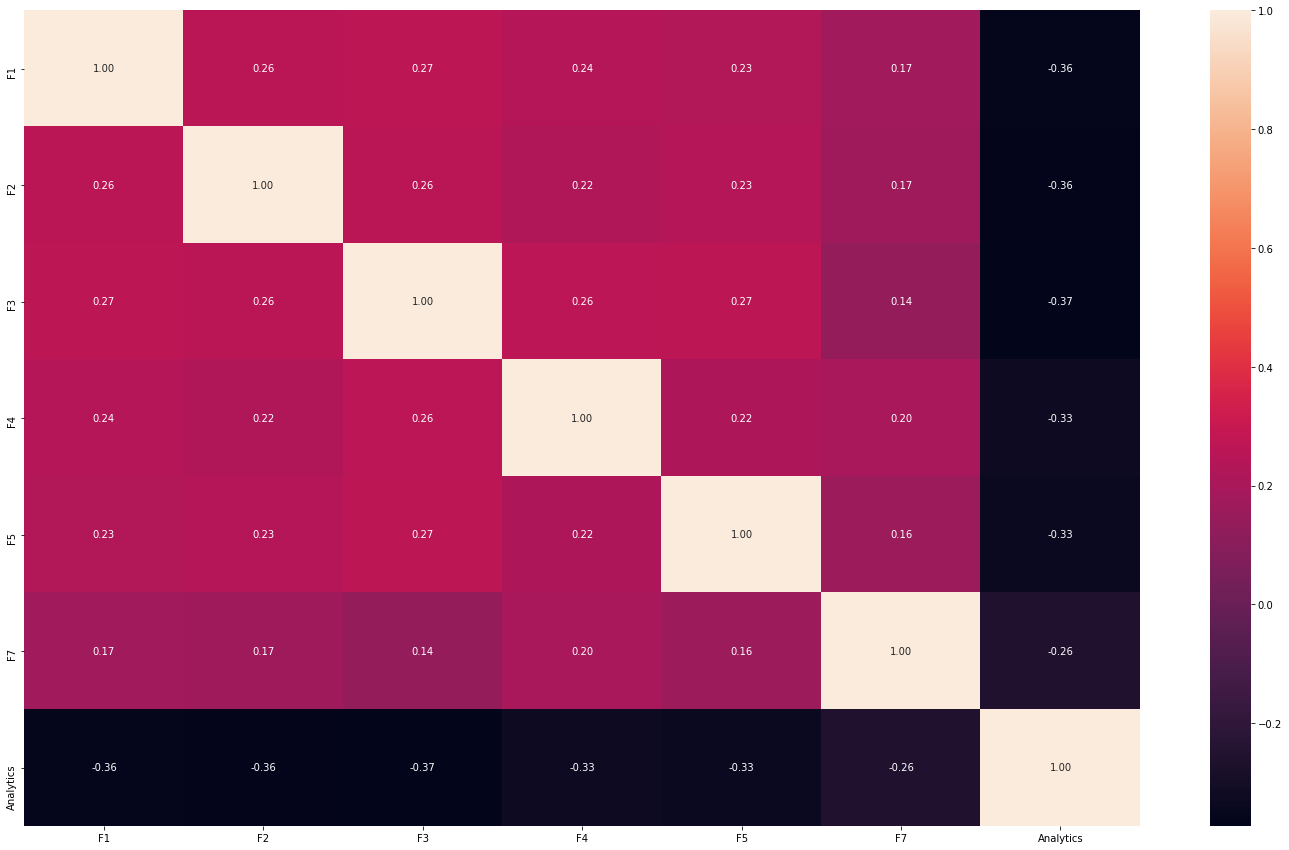

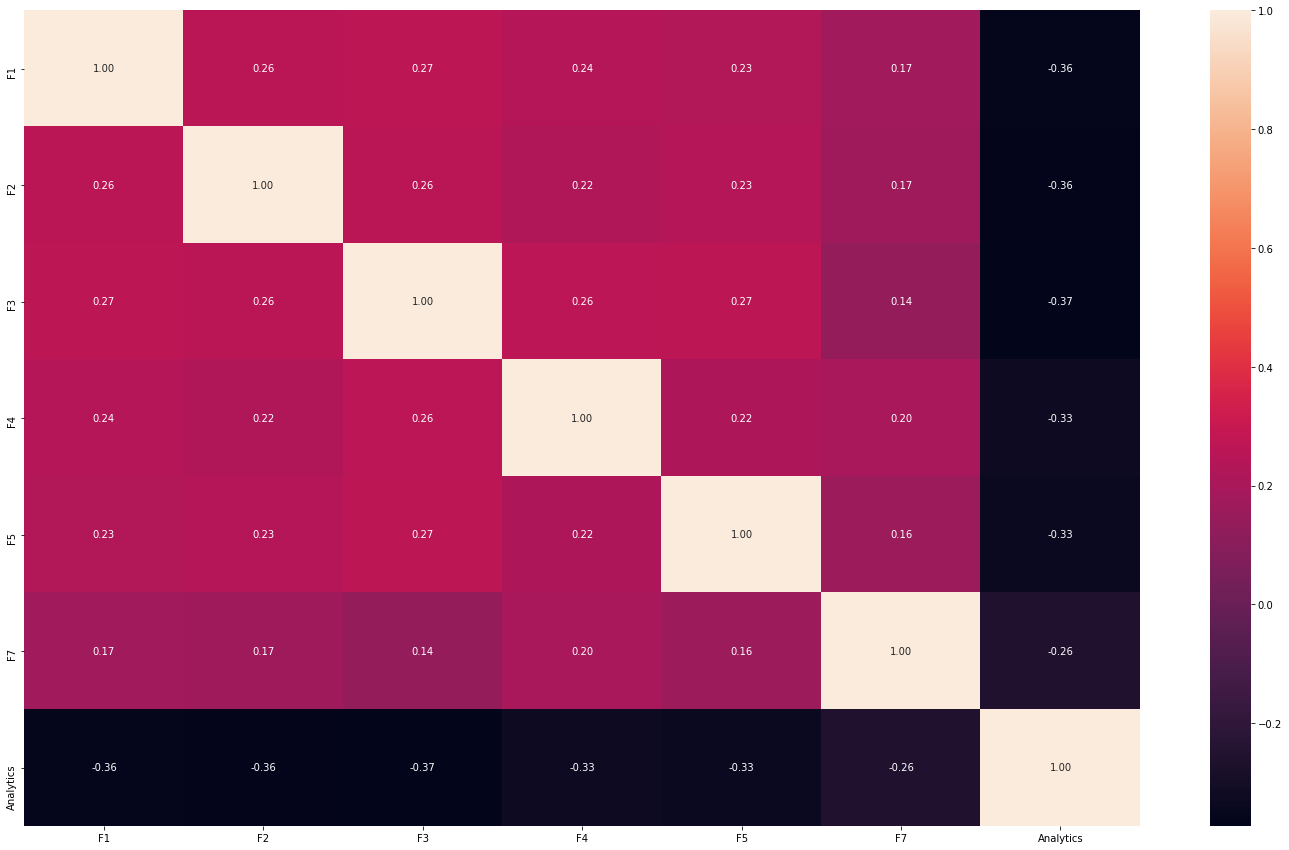

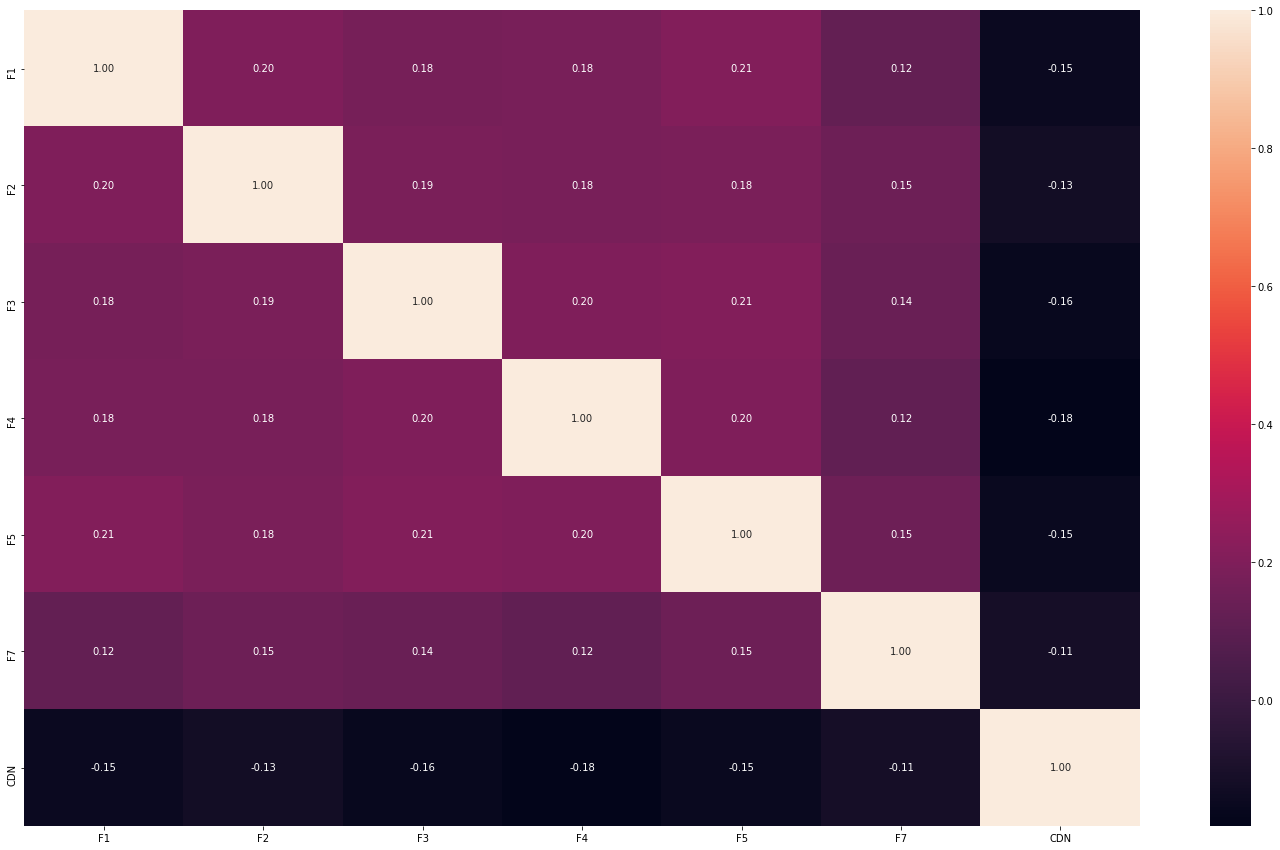

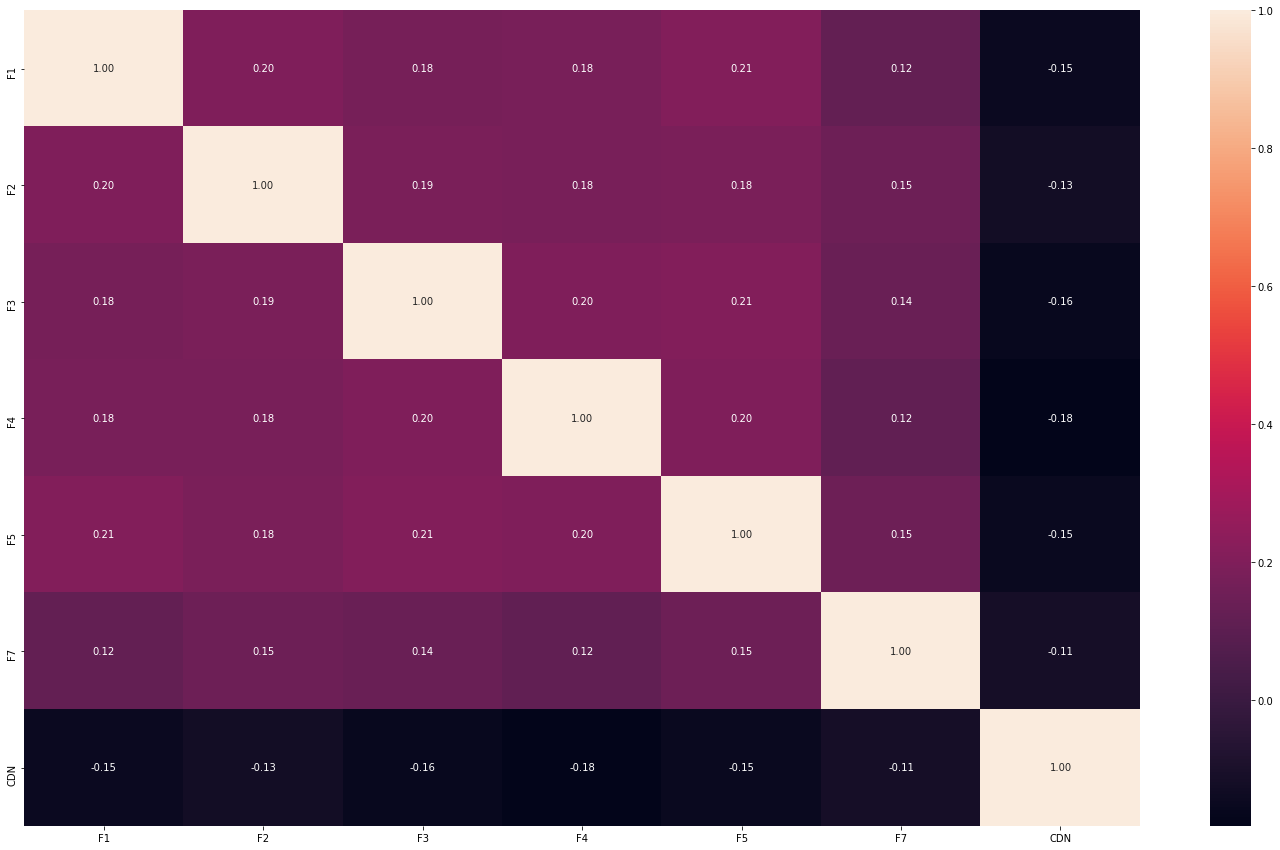

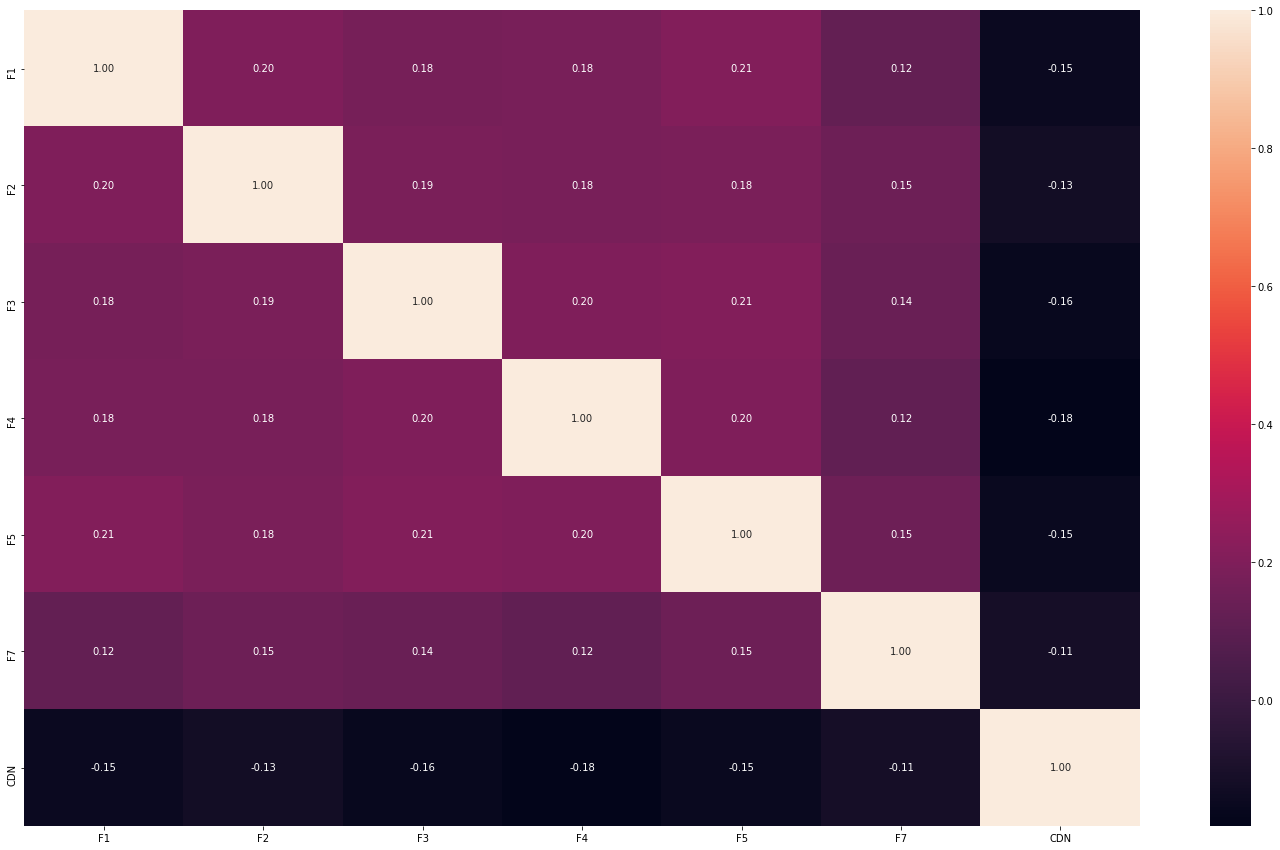

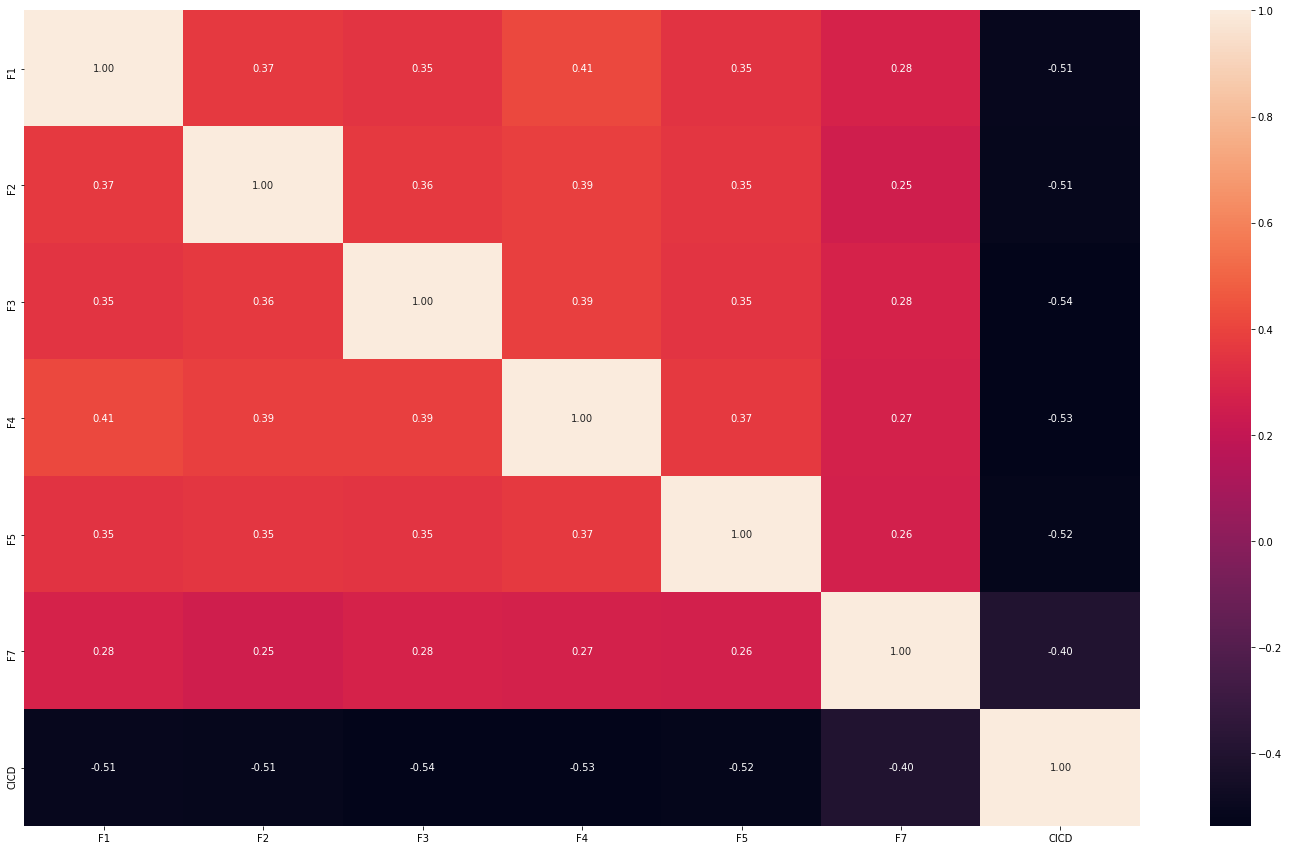

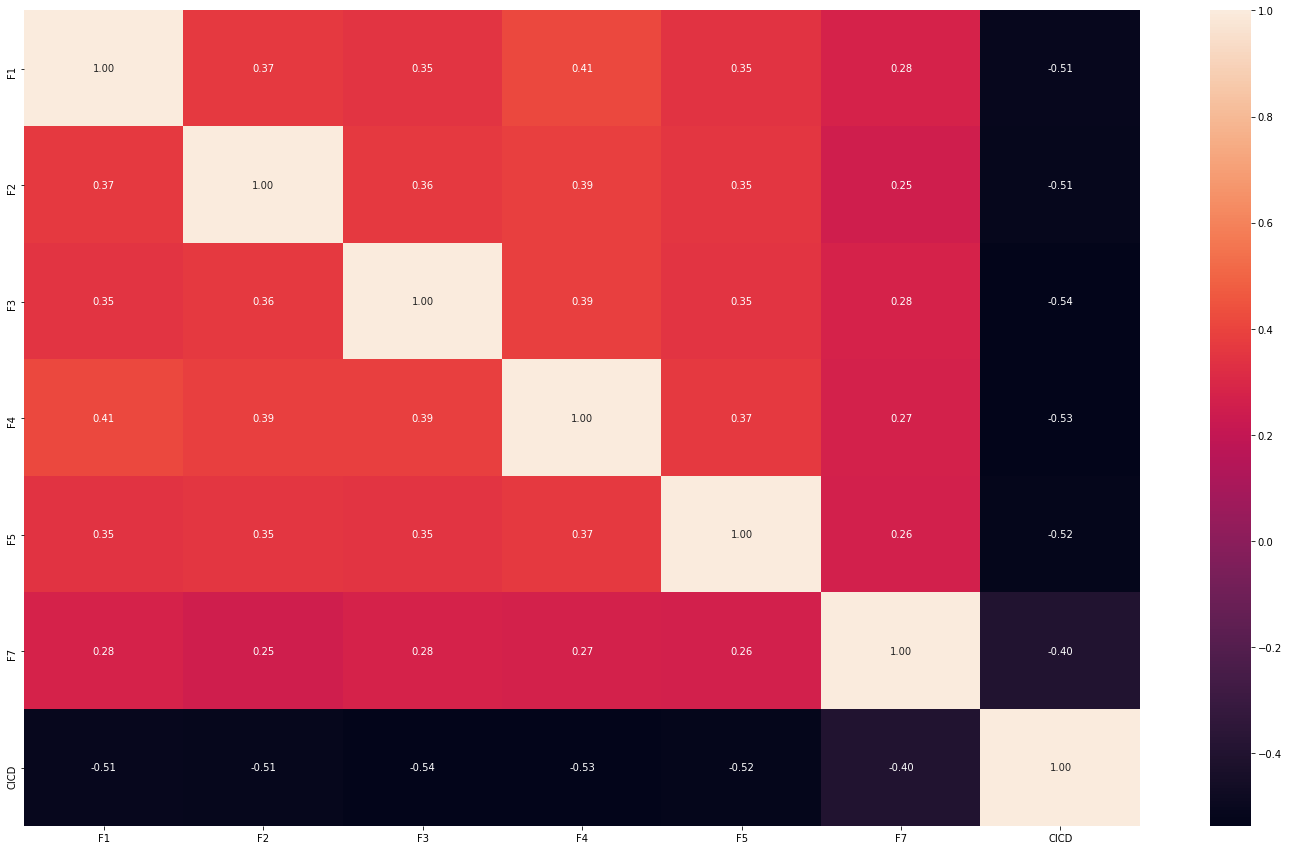

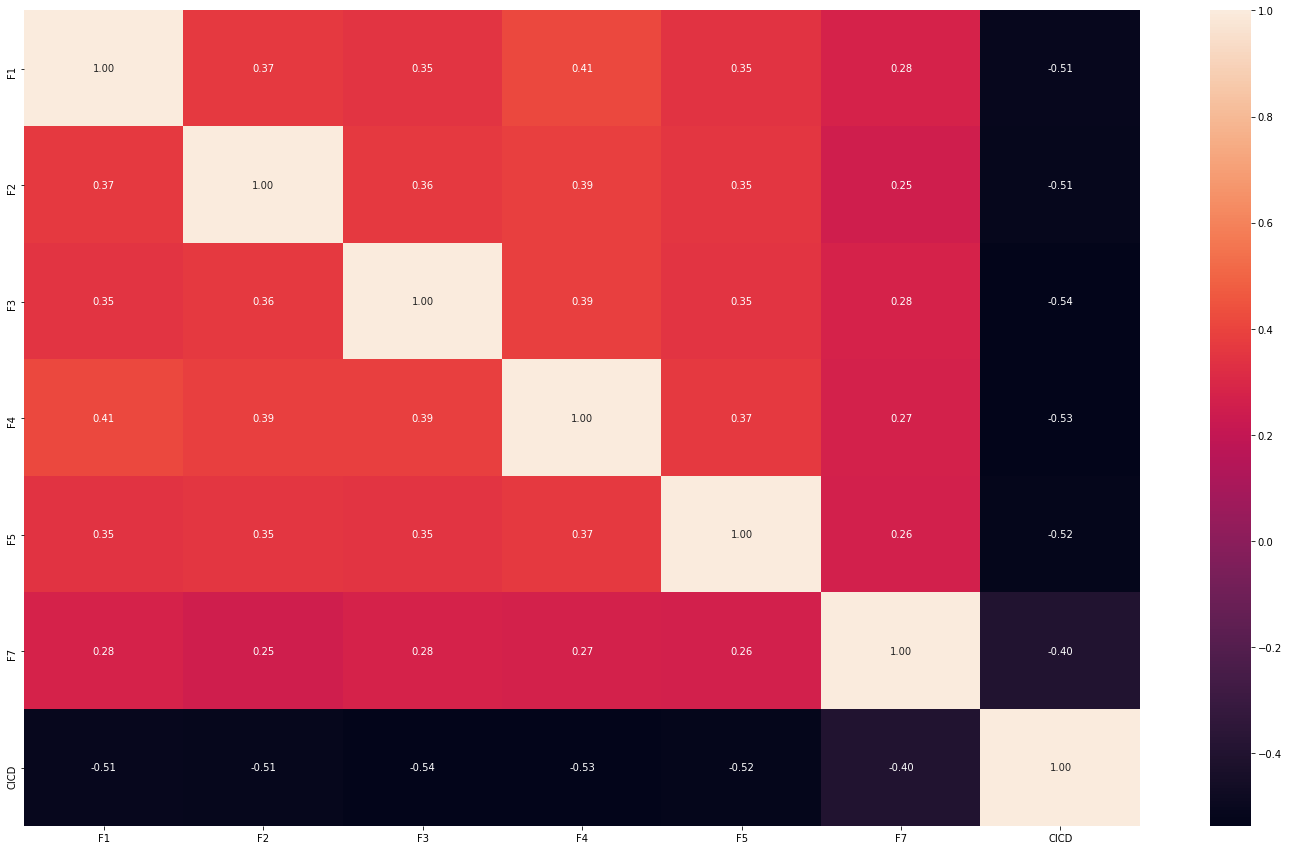

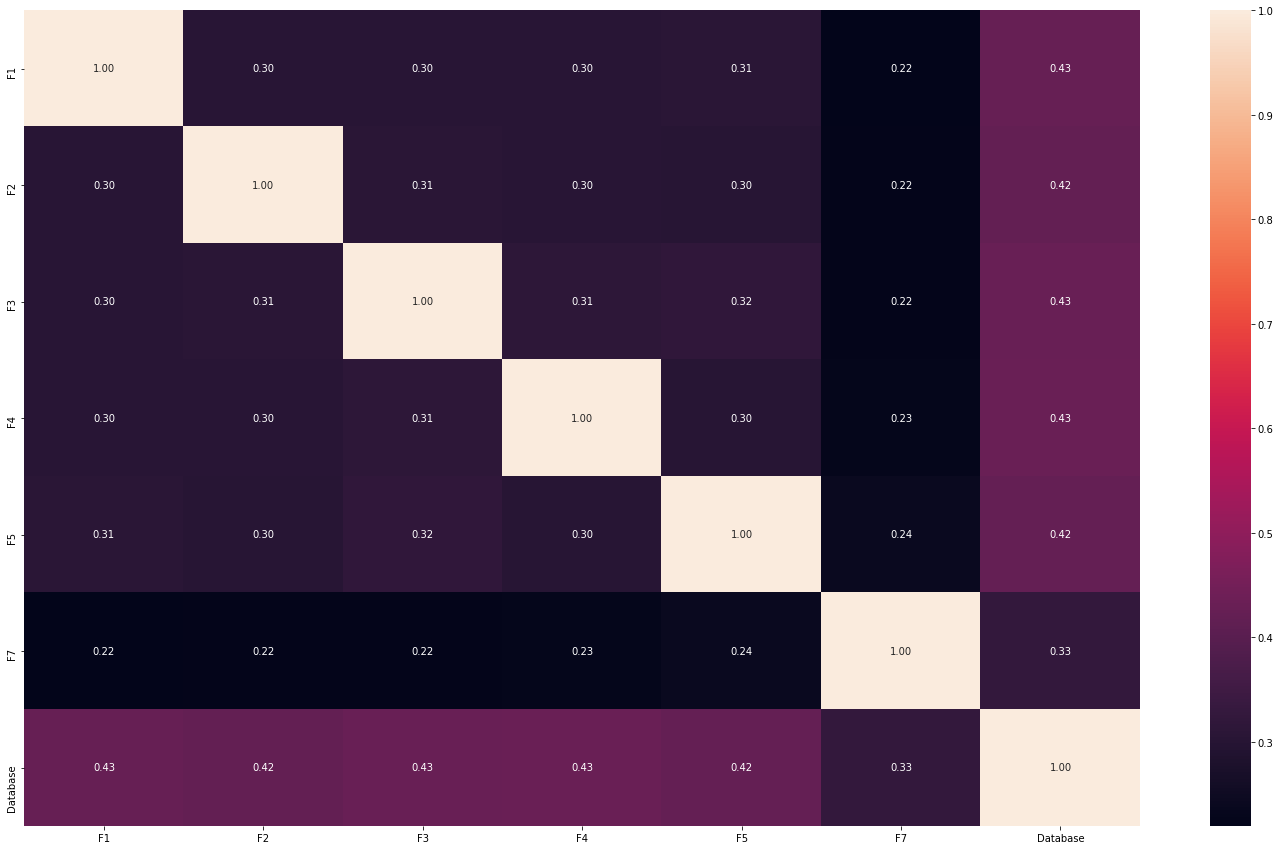

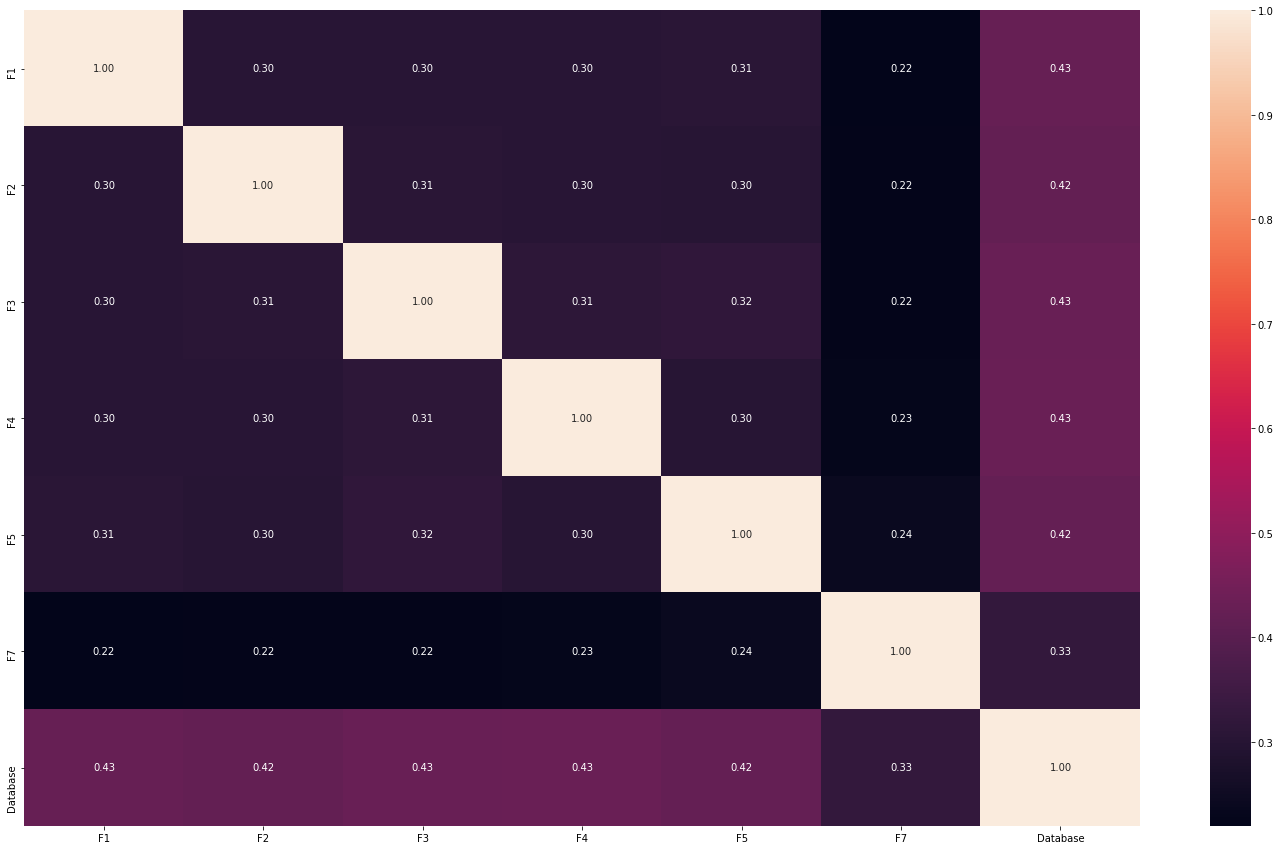

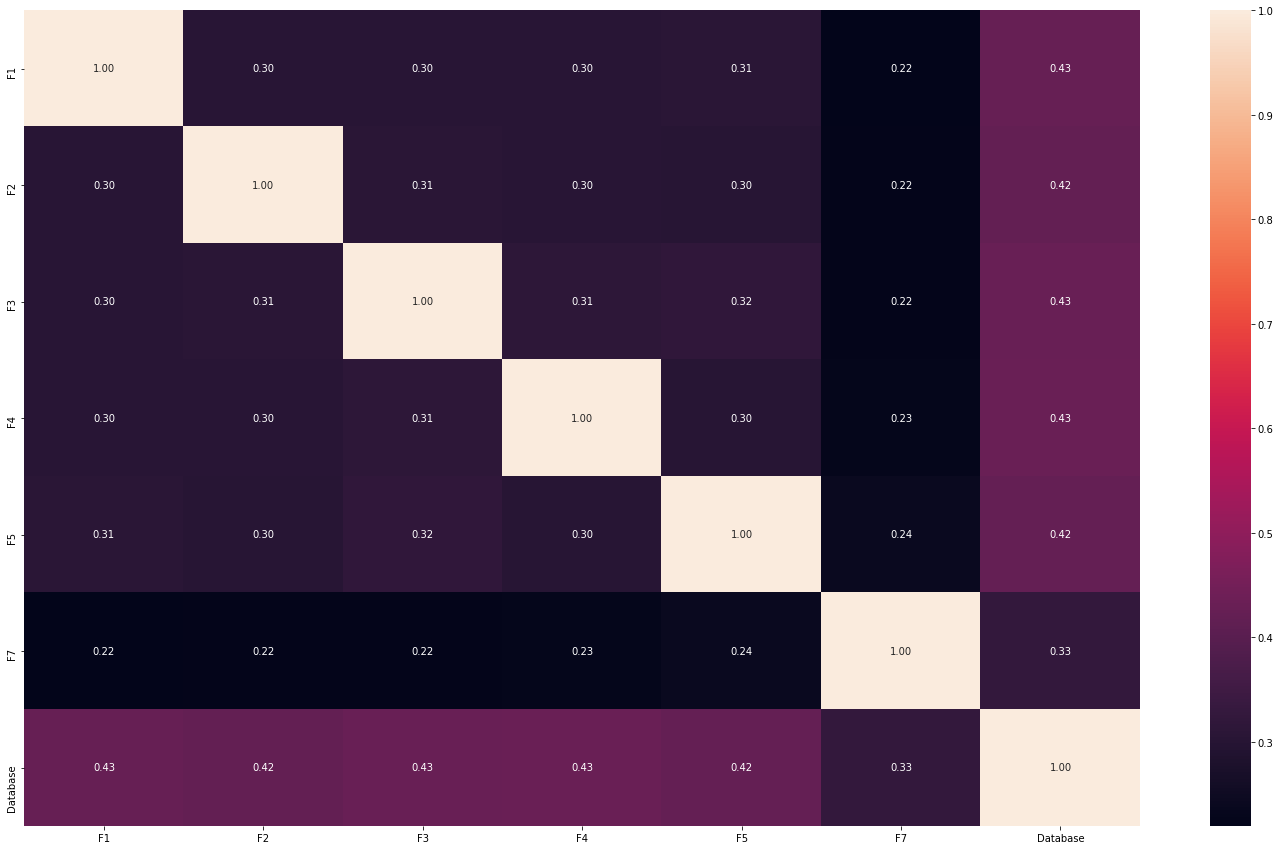

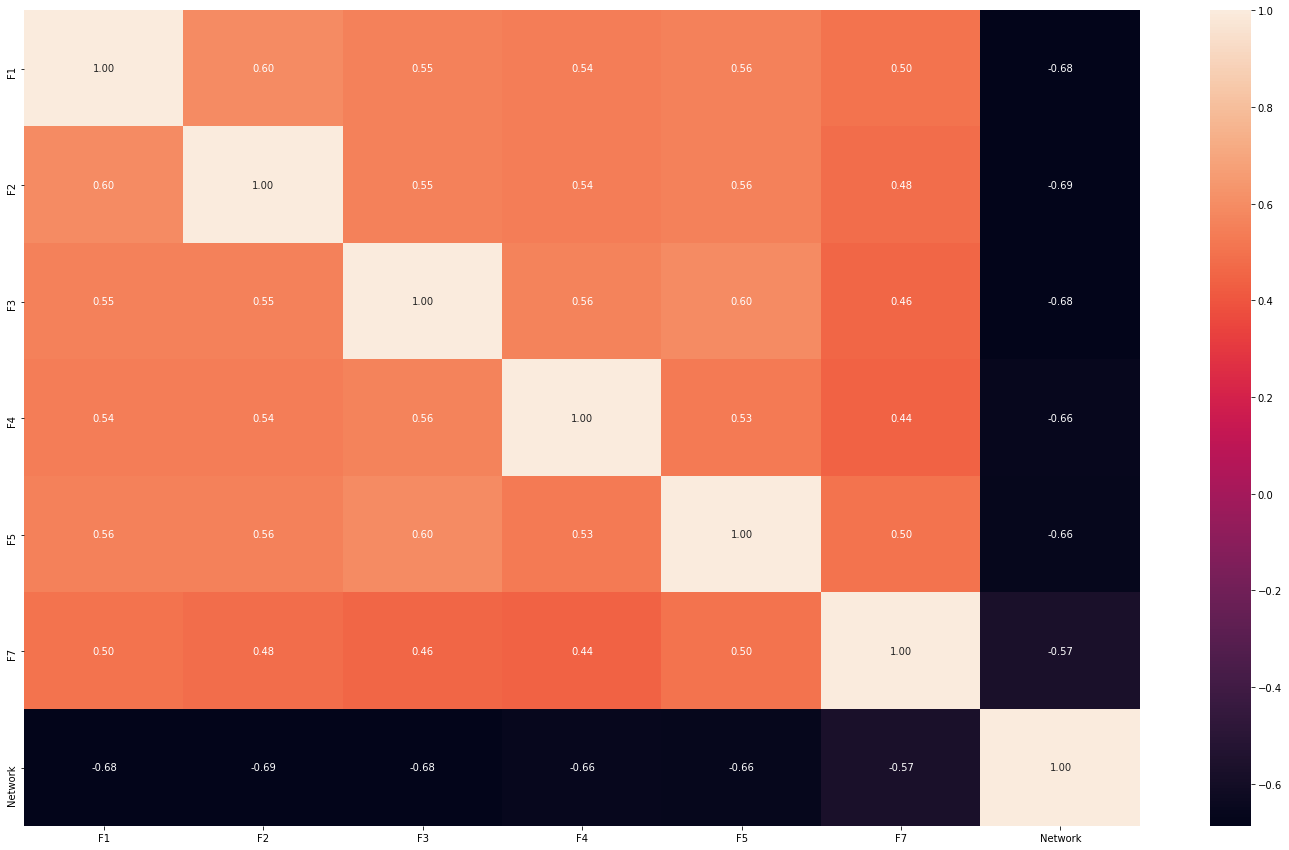

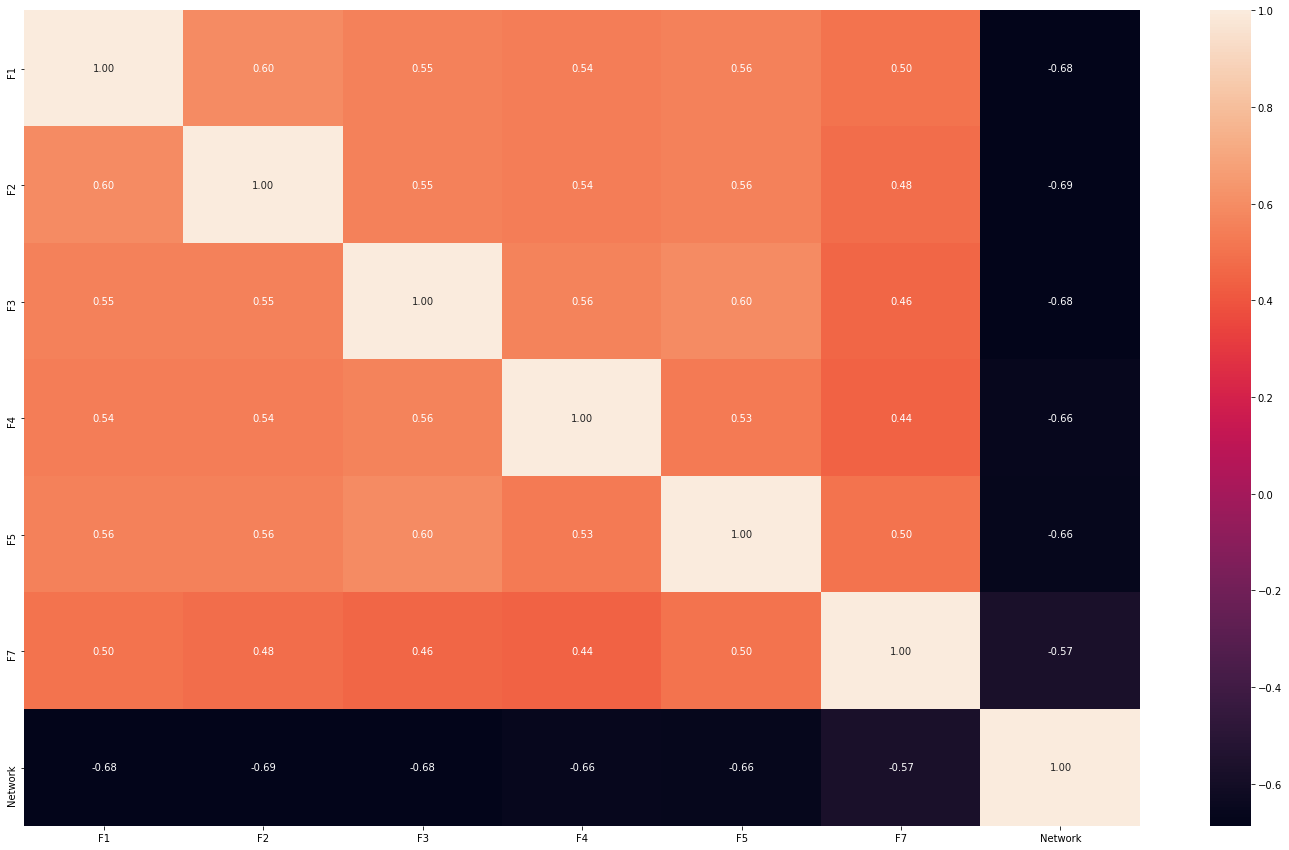

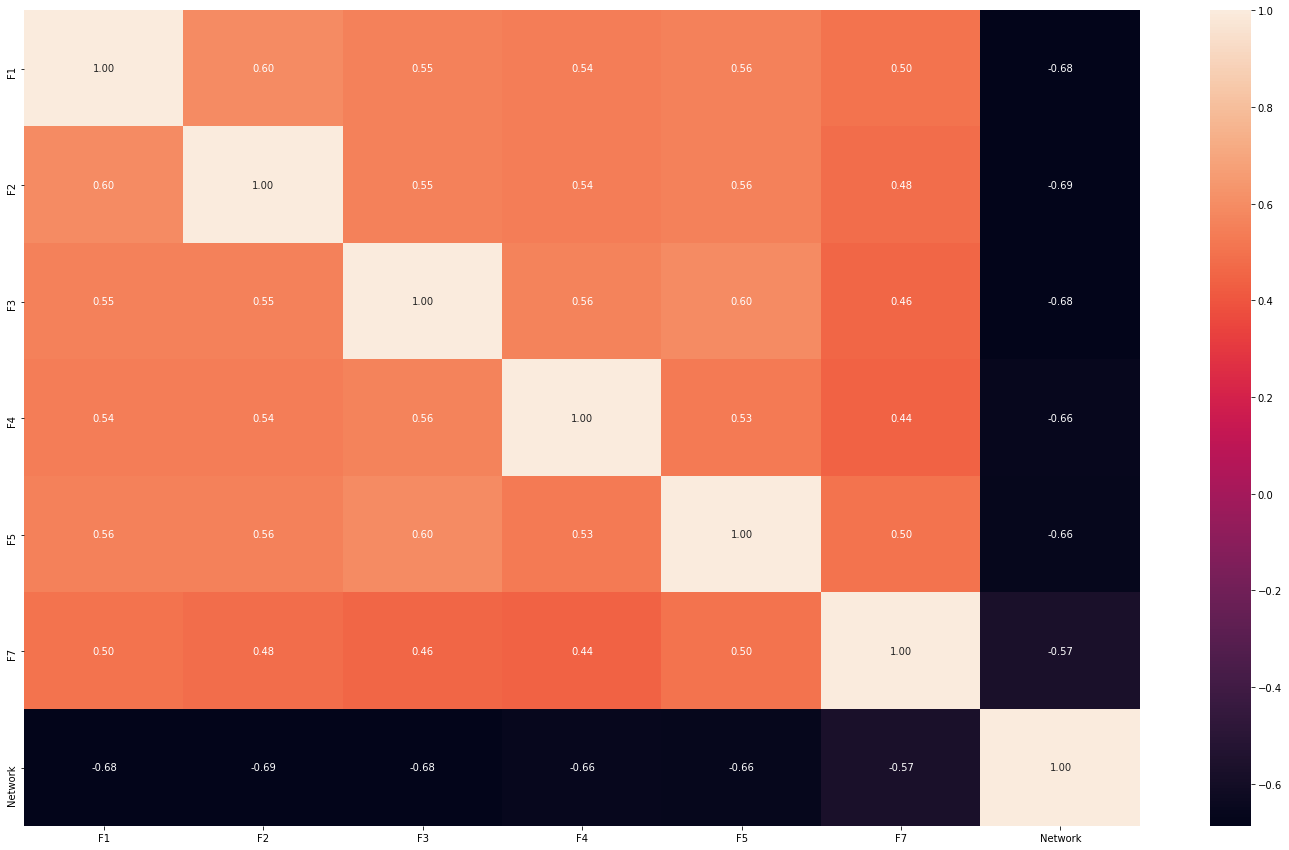

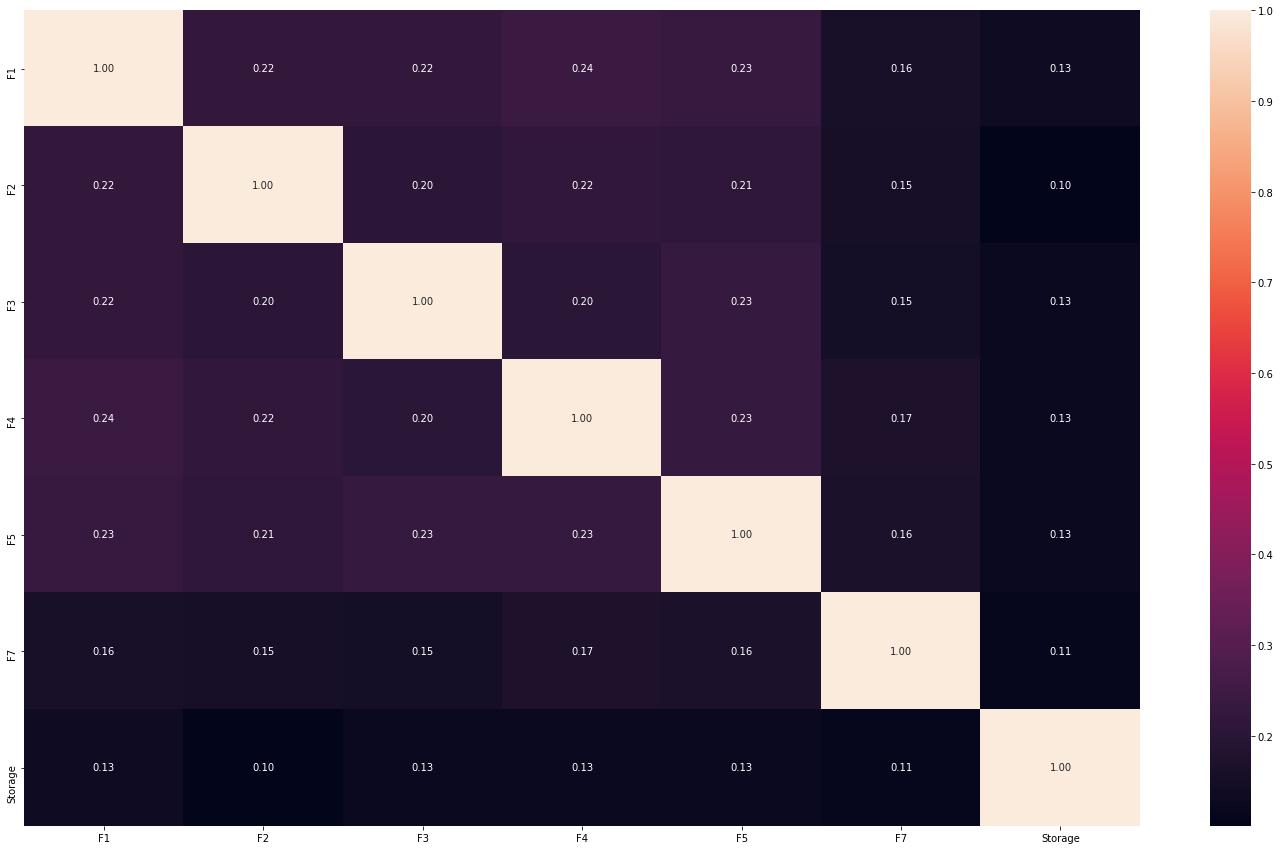

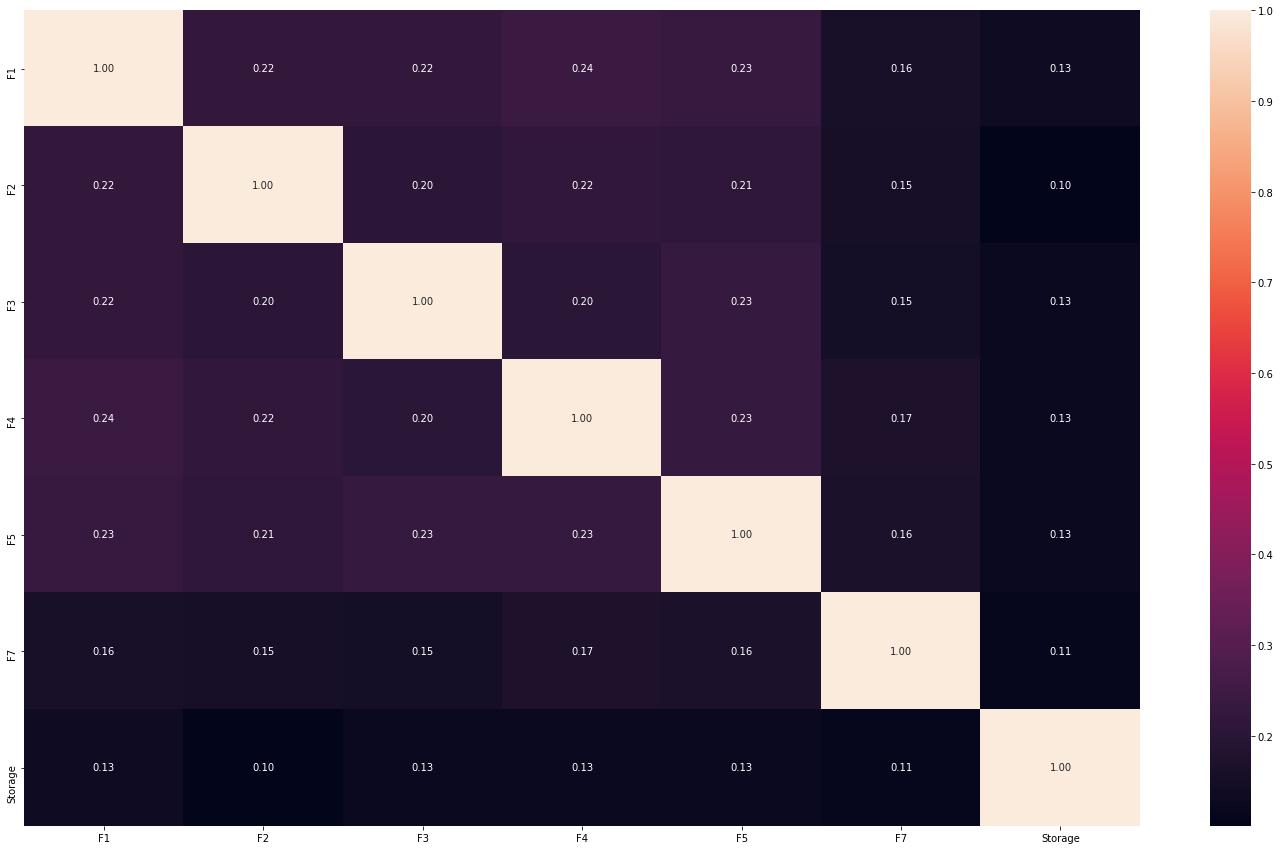

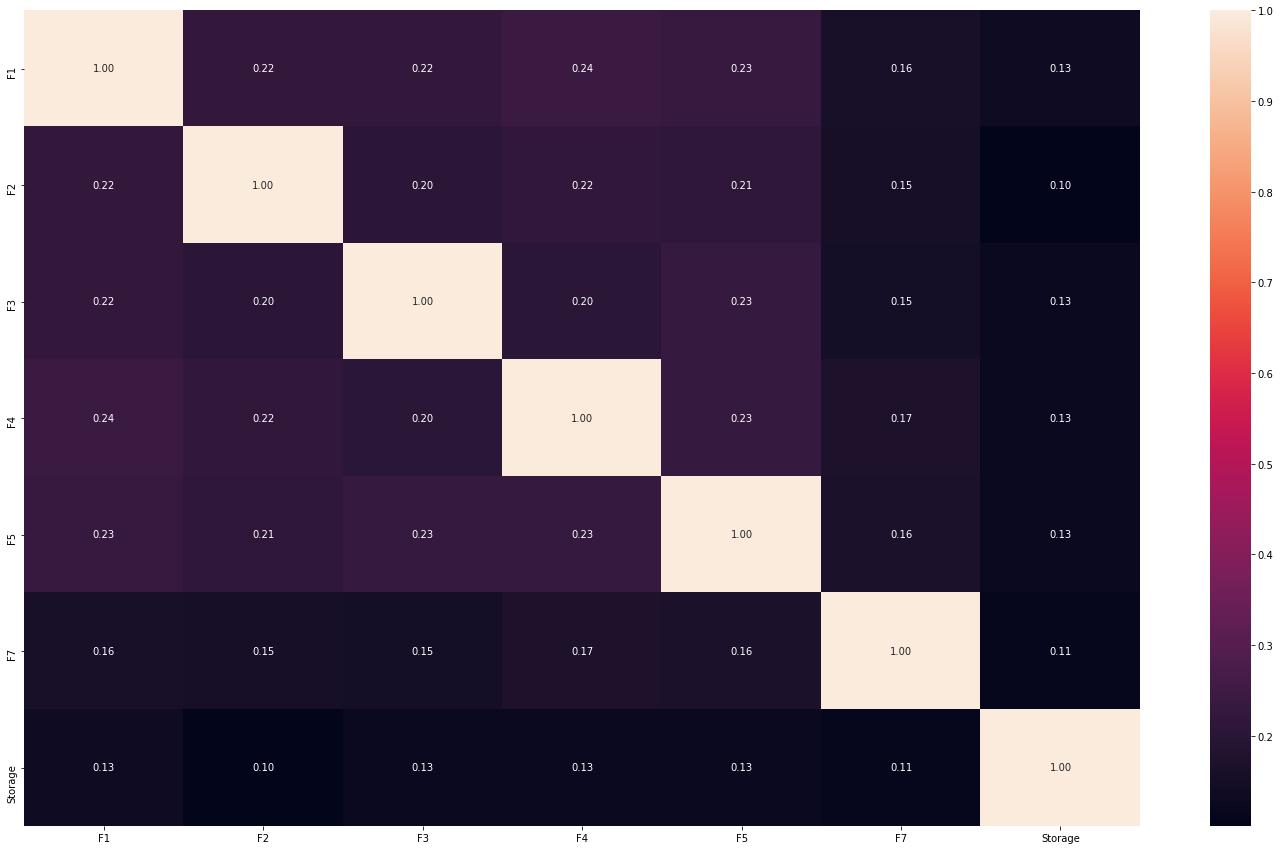

In [169]:
# 20201001 - add F7 remove F6
# 20201001 - change test size from 0.4 to 0.3

df = pd.read_csv('./Cloud_data_service_20201001D35.csv')
df2 = pd.get_dummies(df['Services'])
df3 = pd.concat([df,df2],axis=1)
service_count = df2.columns.size

for i in range(service_count):
    print(f'*****************')
    sample1 = df3[['F1','F2','F3','F4','F5','F7', df2.columns[i]]]
    print(f'\n\n *** Case: {df2.columns[i]}')
    df_majority = sample1[sample1[df2.columns[i]]==0]
    df_minority = sample1[sample1[df2.columns[i]]==1]
    print(f'major row {df_majority.shape}')
    print(f'minor row {df_minority.shape[0]}')
    df_majordownsampled = df_majority.sample(df_minority.shape[0])
    print(f'major row {df_majordownsampled.shape}')
    print(f'minor row {df_minority.shape[0]}')
    sample0 = pd.concat([df_majordownsampled, df_minority])
    print(f'column {i} : sample shape: {sample0.shape}')
    
    Xs = sample0[['F1','F2','F3','F4','F5', 'F7']]
    ys = sample0.drop(['F1','F2','F3','F4','F5','F7'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(Xs,ys,test_size=0.3,random_state=101)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, np.array(y_train).reshape(-1))
    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn.score(X_train, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(X_test, y_test)))
    
    pred = knn.predict(X_test)
    print(f'\n***\n KNN confusion matrix with X_test {X_test.shape}\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    
    
    
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier().fit(X_train, np.array(y_train).reshape(-1))
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    
    pred = clf.predict(X_test)
    print(f'\n***\n Decision Tree confusion matrix with X_test {X_test.shape}\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    
    plt.figure(figsize = (25,15))
    correlation_matrix = sample0.corr()
    sns.heatmap(correlation_matrix, annot=True,fmt=".2f")
    print()
    
    
    from sklearn.svm import SVC
    svm = SVC()
    # svm.fit(X_train, y_train)
    svm.fit(X_train, np.array(y_train).reshape(-1))
    print('Accuracy of SVM classifier on training set: {:.2f}'
         .format(svm.score(X_train, y_train)))
    print('Accuracy of SVM classifier on test set: {:.2f}'
         .format(svm.score(X_test, y_test)))
    
    pred = svm.predict(X_test)
    print(f'\n***\n SVC confusion matrix with X_test {X_test.shape}\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    
    plt.figure(figsize = (25,15))
    correlation_matrix = sample0.corr()
    sns.heatmap(correlation_matrix, annot=True,fmt=".2f")
    print()
    
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier().fit(X_train, np.array(y_train).reshape(-1))
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    
    pred = clf.predict(X_test)
    print(f'\n***\n Decision Tree confusion matrix with X_test {X_test.shape}\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    
    from sklearn.svm import SVC
    svm = SVC()
    # svm.fit(X_train, y_train)
    svm.fit(X_train, np.array(y_train).reshape(-1))
    print('Accuracy of SVM classifier on training set: {:.2f}'
         .format(svm.score(X_train, y_train)))
    print('Accuracy of SVM classifier on test set: {:.2f}'
         .format(svm.score(X_test, y_test)))
    
    pred = svm.predict(X_test)
    print(f'\n***\n SVC confusion matrix with X_test {X_test.shape}\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    
    plt.figure(figsize = (25,15))
    correlation_matrix = sample0.corr()
    sns.heatmap(correlation_matrix, annot=True,fmt=".2f")
    
    ###
    
    Ay_knn = knn.predict(AX_record)
    Ay_clf = clf.predict(AX_record)
    Ay_svm = svm.predict(AX_record)
    
    print(f'\n** prediction test case **\n KNN: {Ay_knn}\n Dec Tree: {Ay_clf}\n SVM: {Ay_svm}\n')

In [170]:
df = pd.read_csv('./Cloud_data_service_20201001D35.csv')
df2 = pd.get_dummies(df['Services'])
df3 = pd.concat([df,df2],axis=1)
service_count = df2.columns.size

In [171]:
sample1 = df3[['F1','F2','F3','F4','F5', 'F7', df2.columns[0]]]

In [172]:
df_majority = sample1[sample1[df2.columns[0]]==0]
df_minority = sample1[sample1[df2.columns[0]]==1]
print(f'major row {df_majority.shape}')
print(f'minor row {df_minority.shape[0]}')

major row (9041, 7)
minor row 959


In [173]:
sample1[sample1['Analytics']==1].shape

(959, 7)

In [174]:
df_majordownsampled = df_majority.sample(df_minority.shape[0])
print(f'major row {df_majordownsampled.shape}')
print(f'minor row {df_minority.shape[0]}')
sample0 = pd.concat([df_majordownsampled, df_minority])
print(f'sample shape: {sample0.shape}')

major row (959, 7)
minor row 959
sample shape: (1918, 7)


In [175]:
from sklearn.model_selection import KFold

In [176]:
kf3 = KFold(n_splits=5, shuffle=True)

In [177]:
kf3

KFold(n_splits=5, random_state=None, shuffle=True)

In [178]:
rn= range(0, (sample0.shape[0]-1))
#rn = range(1,25)
for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)

[   0    1    2 ... 1913 1914 1915] [   8   10   14   15   16   20   30   32   42   49   50   57   62   73
   78   80   83   84   86   88   94   99  103  124  137  140  141  144
  151  154  160  162  164  167  170  172  177  182  194  203  205  206
  216  225  231  233  234  236  241  249  265  273  274  276  286  294
  295  296  300  308  309  312  314  317  319  321  323  328  331  334
  335  341  343  346  351  361  366  379  380  391  397  401  418  427
  445  450  451  452  454  456  458  463  464  465  467  471  476  481
  485  502  503  516  519  522  524  542  548  549  559  566  567  571
  590  600  603  610  613  614  616  622  631  635  638  641  647  654
  657  661  664  665  680  686  690  692  693  694  700  704  710  711
  715  718  720  726  741  742  744  748  750  754  761  767  777  781
  784  790  796  798  808  811  822  833  834  837  844  849  854  864
  865  867  872  876  882  892  899  910  925  929  937  944  958  959
  963  965  968  970  975  979  980  981 

In [179]:
sample0.iloc[[1,2,3,4,5]].loc[:,['F1','F2','F3']]

,F1,F2,F3
1185,5,6,6
8302,6,6,4
7487,6,6,6
420,6,4,6
1414,4,1,1


In [180]:
sample0.columns[6]

'Analytics'

In [181]:
X_train = sample0.iloc[train_index][['F1','F2','F3','F4','F5','F7']]
X_train.shape

(1534, 6)

In [182]:
X_test = sample0.iloc[test_index][['F1','F2','F3','F4','F5','F7']]
X_test.shape

(383, 6)

In [183]:
y_train = sample0.iloc[train_index][sample0.columns[6]]
y_train.shape

(1534,)

In [184]:
j = 1
kf3 = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf3.split(sample0):
    X_train = sample0.iloc[train_index][['F1','F2','F3','F4','F5','F7']]
    X_test = sample0.iloc[test_index][['F1','F2','F3','F4','F5','F7']]
    y_train = sample0.iloc[train_index][sample0.columns[6]]
    y_test = sample0.iloc[test_index][sample0.columns[6]]
    
    svm = SVC()
    # svm.fit(X_train, y_train)
    svm.fit(X_train, np.array(y_train).reshape(-1))
    print(f"Accuracy for the fold no. {j} on the test set:")
    print('Accuracy of SVM classifier on training set: {:.2f}'
         .format(svm.score(X_train, y_train)))
    print('Accuracy of SVM classifier on test set: {:.2f}'
         .format(svm.score(X_test, y_test)))

    j += 1

Accuracy for the fold no. 1 on the test set:
Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.80
Accuracy for the fold no. 2 on the test set:
Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.83
Accuracy for the fold no. 3 on the test set:
Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.78
Accuracy for the fold no. 4 on the test set:
Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.80
Accuracy for the fold no. 5 on the test set:
Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.81


In [185]:
# Final result
# 2020-10-31 Add the tuned hyperparameters into the models

df = pd.read_csv('./Cloud_data_service_20201001D35.csv')
df2 = pd.get_dummies(df['Services'])
df3 = pd.concat([df,df2],axis=1)
service_count = df2.columns.size

for i in range(service_count):
    print(f'*****************')
    sample1 = df3[['F1','F2','F3','F4','F5','F7', df2.columns[i]]]
    print(f'\n\n *** Case: {df2.columns[i]}')
    df_majority = sample1[sample1[df2.columns[i]]==0]
    df_minority = sample1[sample1[df2.columns[i]]==1]
    print(f'major row {df_majority.shape}')
    print(f'minor row {df_minority.shape[0]}')
    df_majordownsampled = df_majority.sample(df_minority.shape[0])
    print(f'major row {df_majordownsampled.shape}')
    print(f'minor row {df_minority.shape[0]}')
    sample0 = pd.concat([df_majordownsampled, df_minority])
    print(f'column {i} : sample shape: {sample0.shape}')
    
    Xs = sample0[['F1','F2','F3','F4','F5', 'F7']]
    ys = sample0.drop(['F1','F2','F3','F4','F5','F7'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(Xs,ys,test_size=0.3,random_state=101)
    
    j = 1
    kf5 = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf5.split(sample0):
        X_train = sample0.iloc[train_index][['F1','F2','F3','F4','F5','F7']]
        X_test = sample0.iloc[test_index][['F1','F2','F3','F4','F5','F7']]
        y_train = sample0.iloc[train_index][sample0.columns[6]]
        y_test = sample0.iloc[test_index][sample0.columns[6]]
    
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=26)
        knn.fit(X_train, np.array(y_train).reshape(-1))
        print(f"\n*****\nAccuracy for the fold no. {j} on the test set:")
        print('Accuracy of K-NN classifier on training set: {:.2f}'
             .format(knn.score(X_train, y_train)))
        print('Accuracy of K-NN classifier on test set: {:.2f}'
             .format(knn.score(X_test, y_test)))
        j += 1
    
    print(f'\n*** end of KNN ***\n')
    
    j = 1
    kf5 = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf5.split(sample0):
        X_train = sample0.iloc[train_index][['F1','F2','F3','F4','F5','F7']]
        X_test = sample0.iloc[test_index][['F1','F2','F3','F4','F5','F7']]
        y_train = sample0.iloc[train_index][sample0.columns[6]]
        y_test = sample0.iloc[test_index][sample0.columns[6]]
    
    
        from sklearn.tree import DecisionTreeClassifier
        clf = DecisionTreeClassifier(max_depth=10).fit(X_train, np.array(y_train).reshape(-1))
        print(f"\n*****\nAccuracy for the fold no. {j} on the test set:")
        print('Accuracy of Decision Tree classifier on training set: {:.2f}'
             .format(clf.score(X_train, y_train)))
        print('Accuracy of Decision Tree classifier on test set: {:.2f}'
             .format(clf.score(X_test, y_test)))
        j += 1
    
    print(f'\n*** end of Decision Tree ***\n')
    
    j = 1
    kf5 = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf5.split(sample0):
        X_train = sample0.iloc[train_index][['F1','F2','F3','F4','F5','F7']]
        X_test = sample0.iloc[test_index][['F1','F2','F3','F4','F5','F7']]
        y_train = sample0.iloc[train_index][sample0.columns[6]]
        y_test = sample0.iloc[test_index][sample0.columns[6]]
    
    
        from sklearn.svm import SVC
        svm = SVC(kernel='rbf', C=10, gamma=0.1)
        # svm.fit(X_train, y_train)
        svm.fit(X_train, np.array(y_train).reshape(-1))
        print(f"\n*****\nAccuracy for the fold no. {j} on the test set:")
        print('Accuracy of SVM classifier on training set: {:.2f}'
             .format(svm.score(X_train, y_train)))
        print('Accuracy of SVM classifier on test set: {:.2f}'
             .format(svm.score(X_test, y_test)))
        j += 1
    
    print(f'\n*** end of SVC ***\n')

*****************


 *** Case: Analytics
major row (9041, 7)
minor row 959
major row (959, 7)
minor row 959
column 0 : sample shape: (1918, 7)

*****
Accuracy for the fold no. 1 on the test set:
Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.79

*****
Accuracy for the fold no. 2 on the test set:
Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.81

*****
Accuracy for the fold no. 3 on the test set:
Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.77

*****
Accuracy for the fold no. 4 on the test set:
Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.77

*****
Accuracy for the fold no. 5 on the test set:
Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.74

*** end of KNN ***


*****
Accuracy for the fold no. 1 on the test set:
Accuracy of Decision Tree classifier on trai

In [100]:
df2.columns[1]

'CDN'

In [101]:
## downsampling

df = pd.read_csv('./Cloud_data_service_20201001D35.csv')
df2 = pd.get_dummies(df['Services'])
df3 = pd.concat([df,df2],axis=1)
service_count = df2.columns.size

for i in range(service_count):
    print(f'*****************')
    sample1 = df3[['F1','F2','F3','F4','F5','F7', df2.columns[i]]]
    print(f'\n\n *** Case: {df2.columns[i]}')
    df_majority = sample1[sample1[df2.columns[i]]==0]
    df_minority = sample1[sample1[df2.columns[i]]==1]
    print(f'major row {df_majority.shape}')
    print(f'minor row {df_minority.shape[0]}')
    df_majordownsampled = df_majority.sample(df_minority.shape[0])
    print(f'major row {df_majordownsampled.shape}')
    print(f'minor row {df_minority.shape[0]}')
    sample0 = pd.concat([df_majordownsampled, df_minority])
    print(f'column {i} : sample shape: {sample0.shape}')
    
    Xs = sample0[['F1','F2','F3','F4','F5', 'F7']]
    ys = sample0.drop(['F1','F2','F3','F4','F5','F7'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(Xs,ys,test_size=0.3,random_state=101)
    
    j = 1
    kf5 = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf5.split(sample0):
        X_train = sample0.iloc[train_index][['F1','F2','F3','F4','F5','F7']]
        X_test = sample0.iloc[test_index][['F1','F2','F3','F4','F5','F7']]
        y_train = sample0.iloc[train_index][sample0.columns[6]]
        y_test = sample0.iloc[test_index][sample0.columns[6]]
    
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier()
        knn.fit(X_train, np.array(y_train).reshape(-1))
        print(f"\n*****\nAccuracy for the fold no. {j} on the test set:")
        print('Accuracy of K-NN classifier on training set: {:.2f}'
             .format(knn.score(X_train, y_train)))
        print('Accuracy of K-NN classifier on test set: {:.2f}'
             .format(knn.score(X_test, y_test)))
        j += 1
    
    print(f'\n*** end of KNN ***\n')

*****************


 *** Case: Analytics
major row (9041, 7)
minor row 959
major row (959, 7)
minor row 959
column 0 : sample shape: (1918, 7)

*****
Accuracy for the fold no. 1 on the test set:
Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.80

*****
Accuracy for the fold no. 2 on the test set:
Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.78

*****
Accuracy for the fold no. 3 on the test set:
Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.76

*****
Accuracy for the fold no. 4 on the test set:
Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.76

*****
Accuracy for the fold no. 5 on the test set:
Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.75

*** end of KNN ***

*****************


 *** Case: CDN
major row (7945, 7)
minor row 2055
major row (2055, 7)
minor 

In [102]:
sample1.count

<bound method DataFrame.count of       F1  F2  F3  F4  F5  F7  Storage
0      2   3   4   6   6   6        1
1      3   1   1   1   6   3        0
2      6   6   5   6   4   5        0
3      4   4   6   5   5   5        0
4      4   4   4   5   3   6        1
...   ..  ..  ..  ..  ..  ..      ...
9995   6   4   5   4   6   6        0
9996   2   2   1   1   6   1        0
9997   6   5   6   6   4   6        0
9998   5   5   1   3   5   3        0
9999   6   5   6   5   4   2        0

[10000 rows x 7 columns]>

In [103]:
sample0.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F7', 'Storage'], dtype='object')

In [104]:
sample0

,F1,F2,F3,F4,F5,F7,Storage
8373,6,5,6,6,3,4,0
597,6,6,4,5,6,4,0
9297,6,3,2,2,6,6,0
3344,3,4,3,2,2,2,0
4650,6,4,5,6,6,6,0
...,...,...,...,...,...,...,...
9963,6,2,4,6,5,3,1
9972,6,5,6,6,5,5,1
9975,3,5,4,6,6,6,1
9989,5,3,6,4,4,5,1


In [105]:
svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)